#  House Price Prediction


The objective of this project is to predict the SalePrice of the houses from 80 features. 

### Regression models used

    1. LinearRegresssion
    2. Ridge Regression
    3. Decision Tree
    4. Random Forest
    5. Gradient Boost Regression
    6. Extreme Gradient Boost Regression
    7. SVR
    8. Stacking Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression ,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error , mean_squared_error 
from time import time

In [2]:
df= pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df_test= pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [7]:
df.isnull().sum()[df.isnull().sum()*100/df.shape[0] > 70]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [8]:
# Removing columns with more than 70% null values
df = df.drop(df.columns[df.isnull().sum()> 1178],1)
df.shape

/var/folders/0r/q_8nrq1s77lbvmzhtbgcwsbw0000gn/T/ipykernel_21705/4160919774.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df.columns[df.isnull().sum()> 1178],1)


(1460, 77)

In [9]:
# Removing reows with more than 60 null values
df=df[df.isnull().sum(axis=1)<50]
df.shape

(1460, 77)

In [10]:
# dividing categorical and numerical features

categorical_features= df.select_dtypes('object')
categorical_features

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0         CollgCr       Norm       Norm  ...          Gd        Typ   
1         Veenker      Feedr       Norm  ...          TA        Typ   
2         CollgCr       Norm       Norm  ...          Gd        Typ   
3         Crawfor       Norm       Norm  ...          Gd        Typ   
4         NoRidge       Norm       Norm  ...          Gd        Typ   
...           ...        ...        ...  ...         ...        ...   
1455      Gilbert       Norm       Norm  ...          TA        Typ   
1456       NWAmes       Norm       Norm  ...          TA       Min1   
1457      Crawfor       Norm       Norm  ...          Gd        Typ   
1458        NAmes       Norm       Norm  ...          Gd        Typ   
1459      Edwards       Norm       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0            NaN     Attchd          RFn         TA         TA          Y   
1             TA     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
3             Gd     Detchd          Unf         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1455          TA     Attchd          RFn         TA         TA          Y   
1456          TA     Attchd          Unf         TA         TA          Y   
1457          Gd     Attchd          RFn         TA         TA          Y   
1458         NaN     Attchd          Unf         TA         TA          Y   
1459         NaN     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1455       WD        Normal  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  

[1460 rows x 39 columns]

In [11]:
numerical_features= df.select_dtypes(exclude='object')
numerical_features.drop('Id',axis=1,inplace=True)

numerical_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

In [12]:
discreet_features=["OverallQual","OverallCond","YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath",
                   "HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars",
                   "MoSold","YrSold"]


In [13]:
categorical_features.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

/Users/gayathri/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


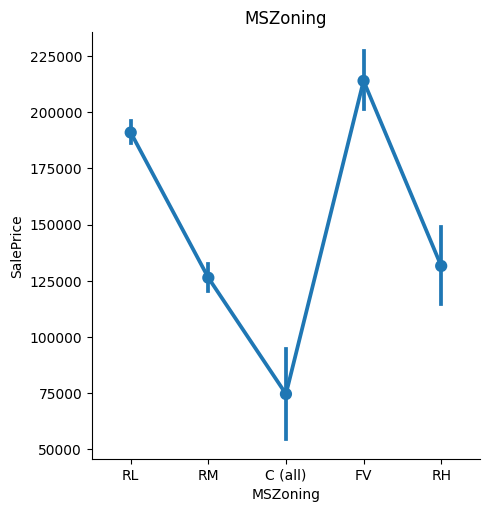

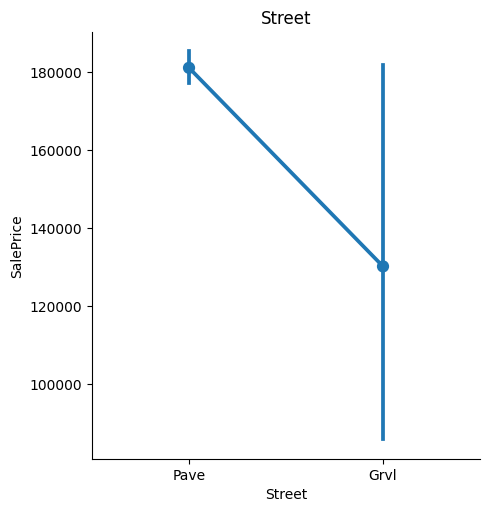

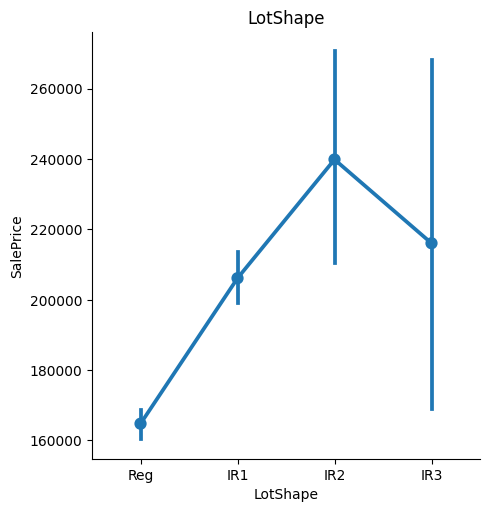

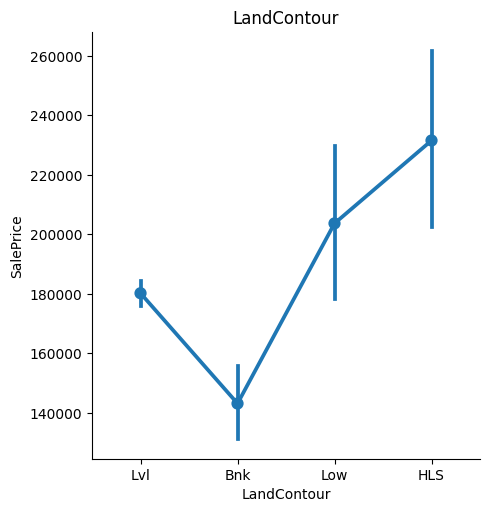

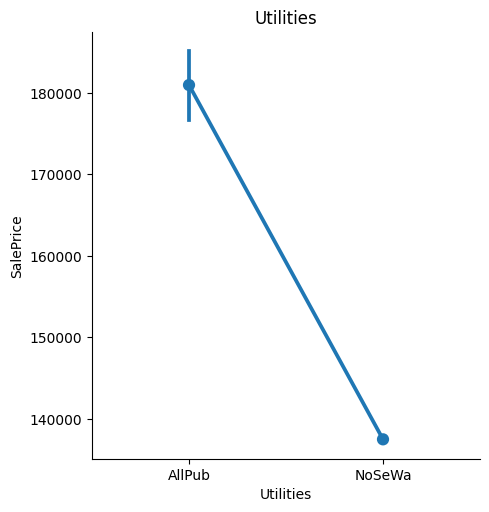

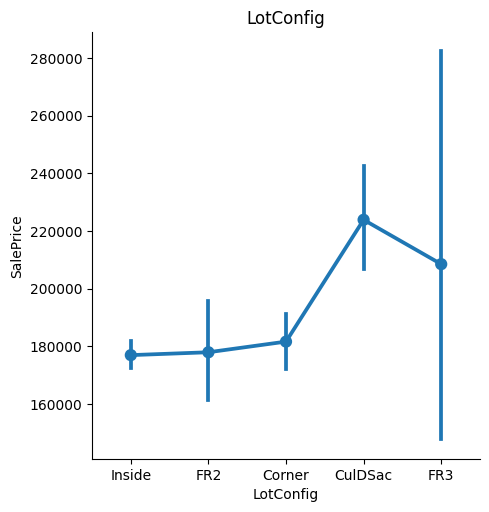

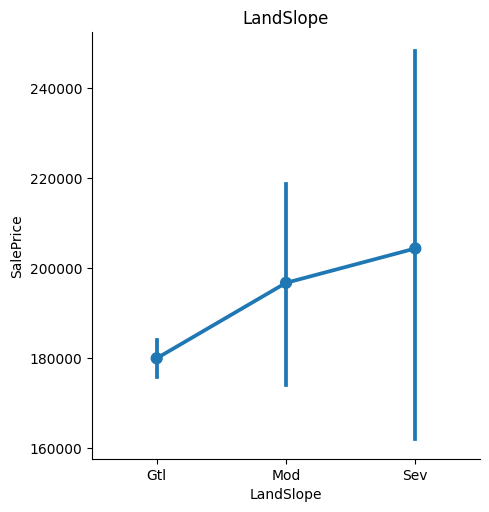

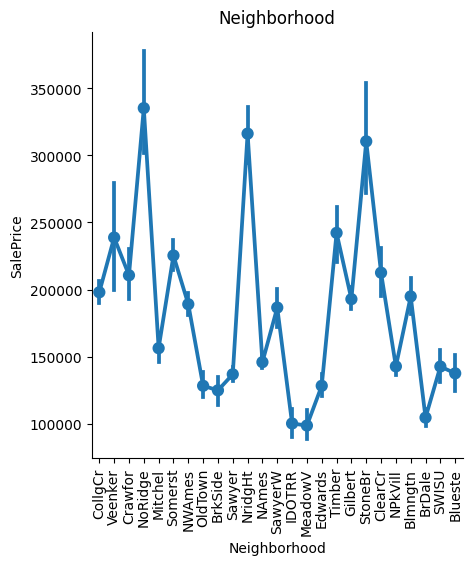

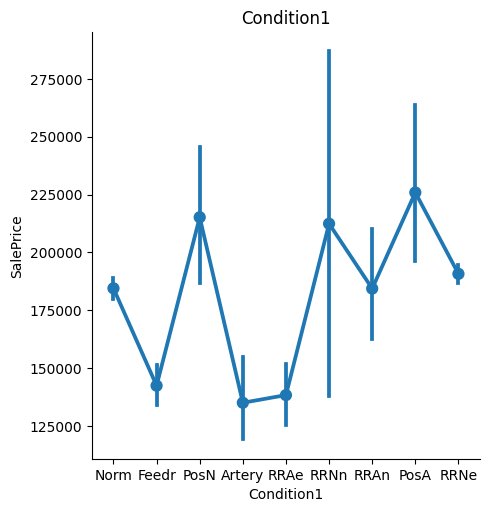

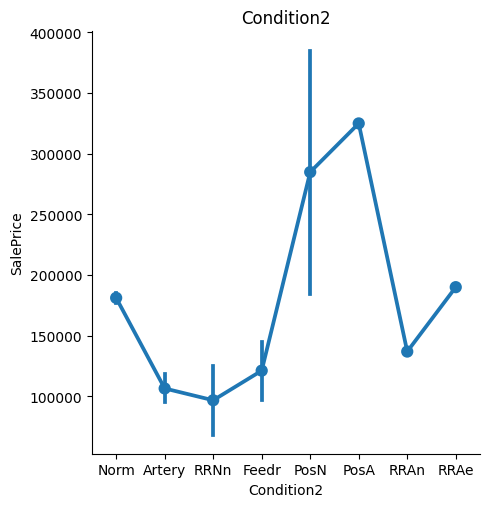

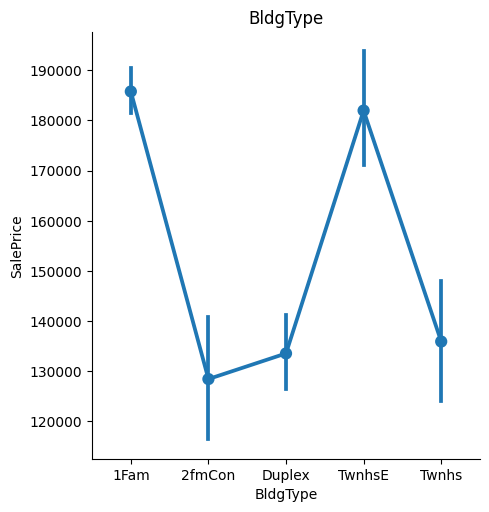

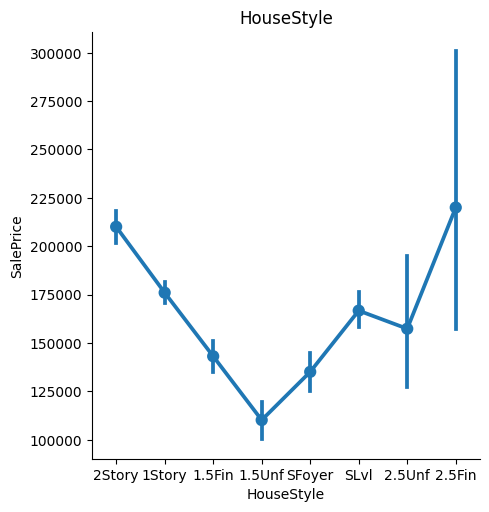

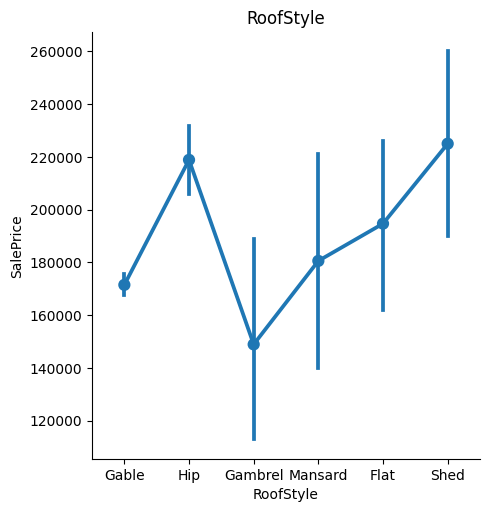

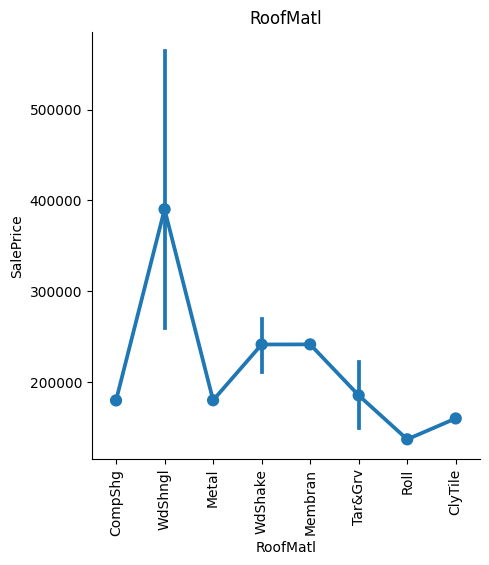

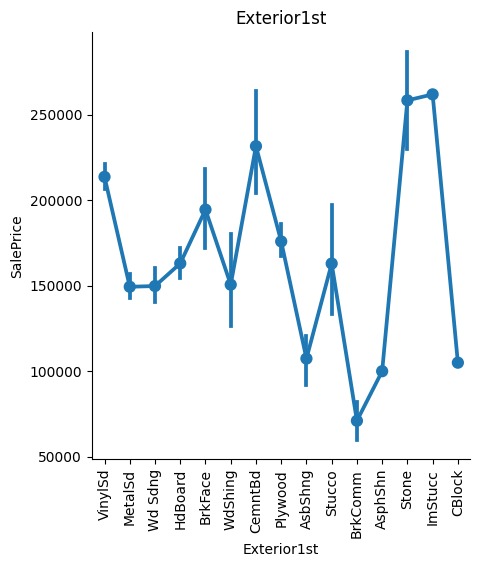

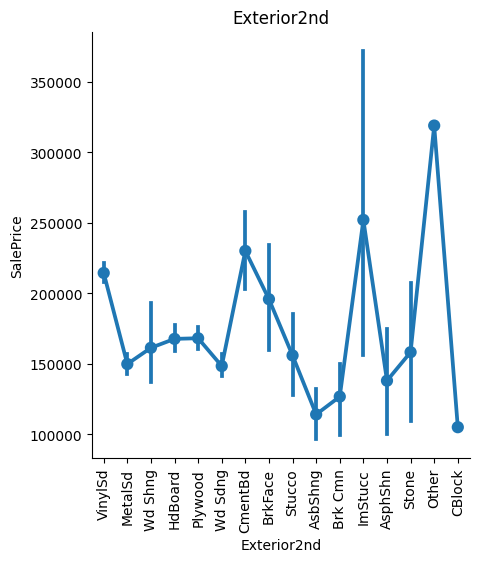

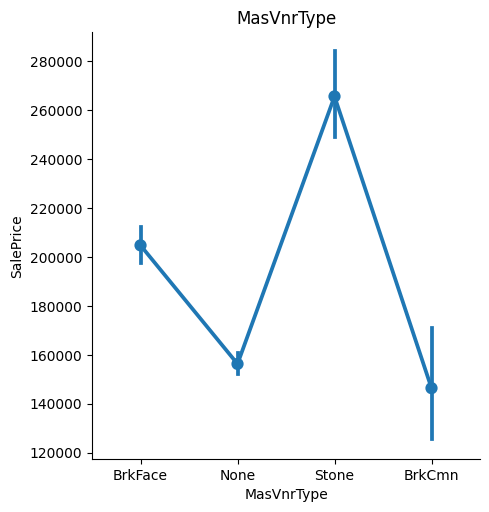

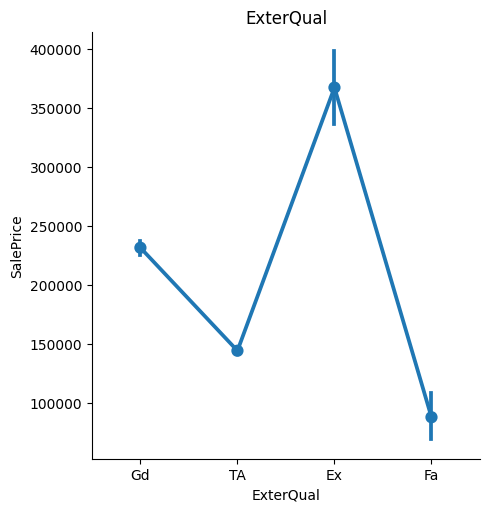

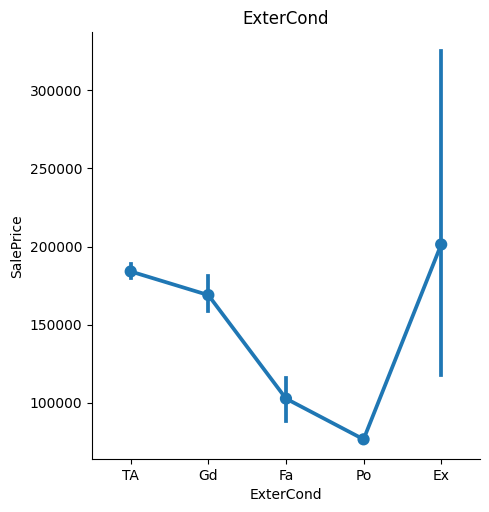

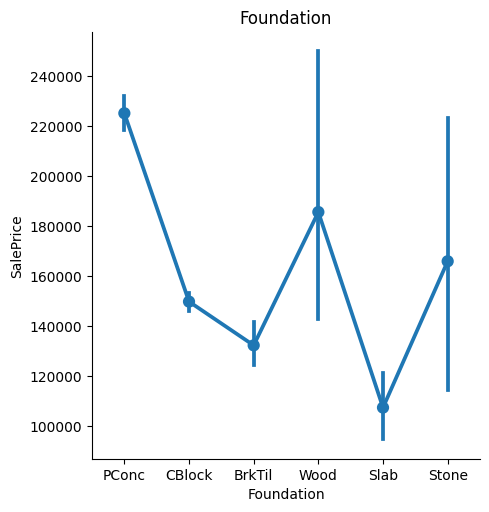

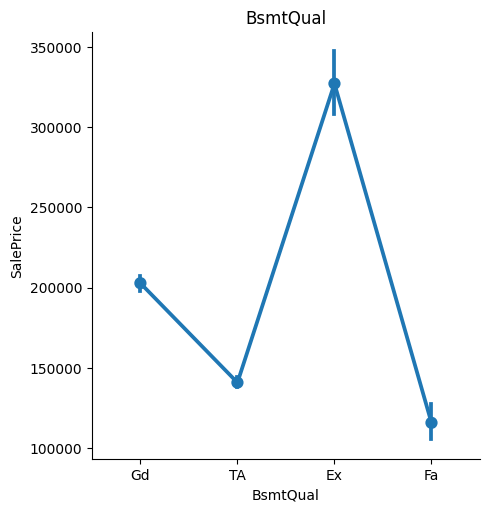

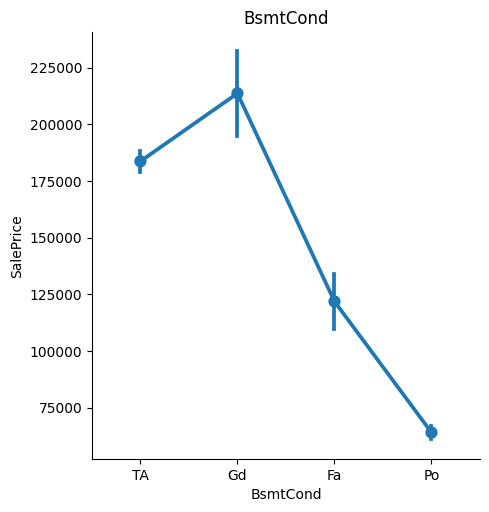

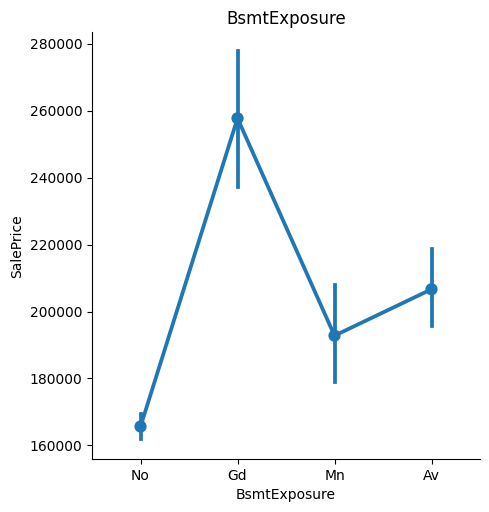

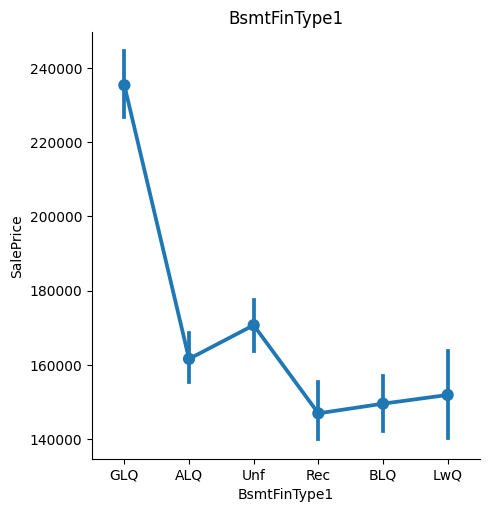

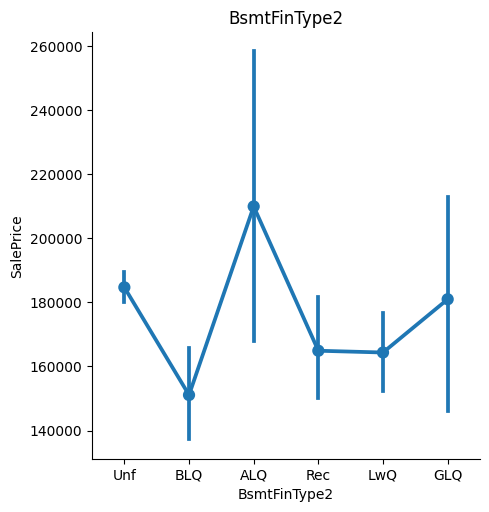

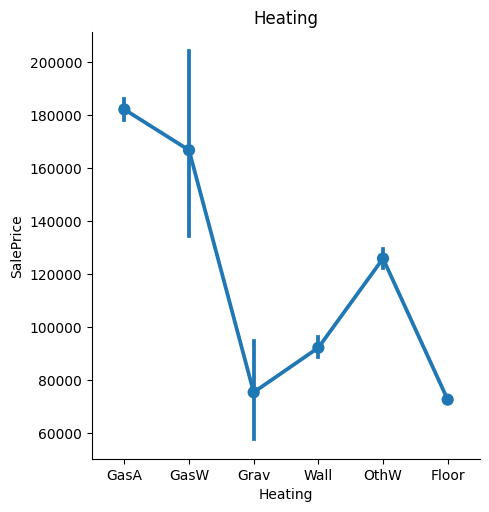

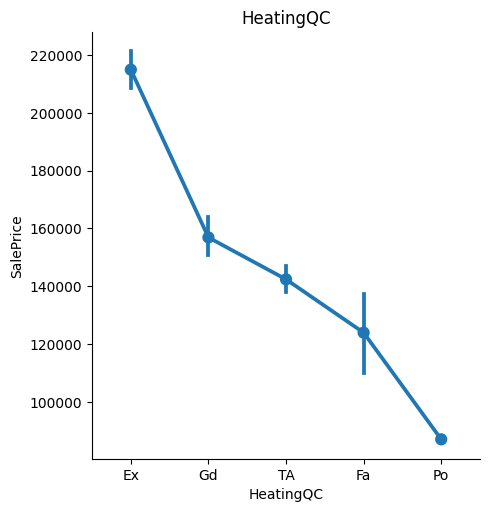

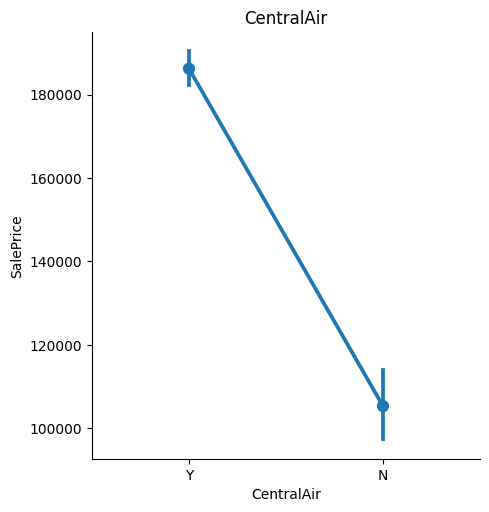

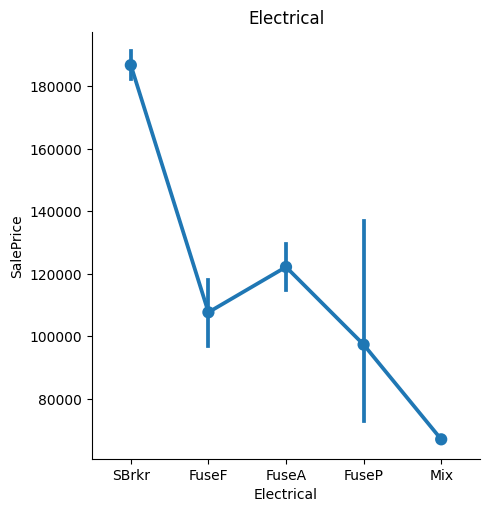

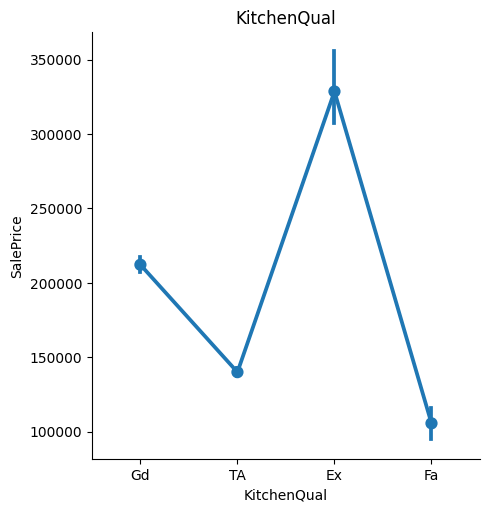

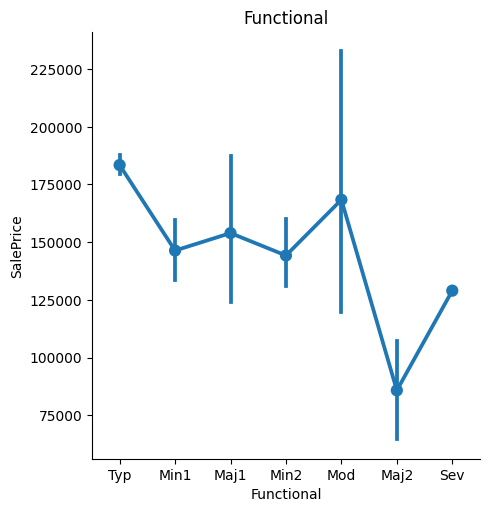

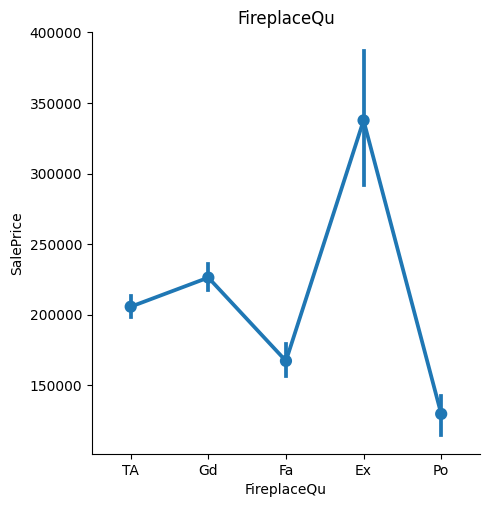

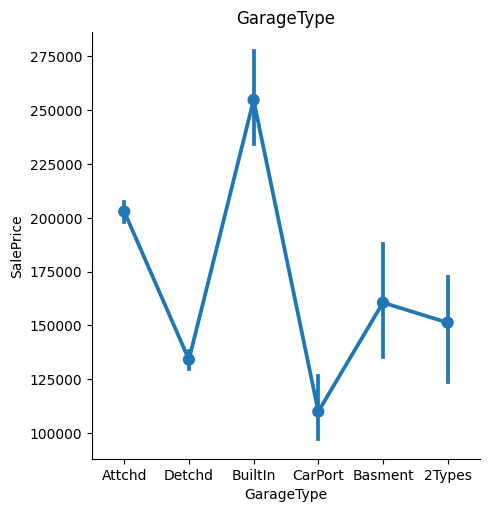

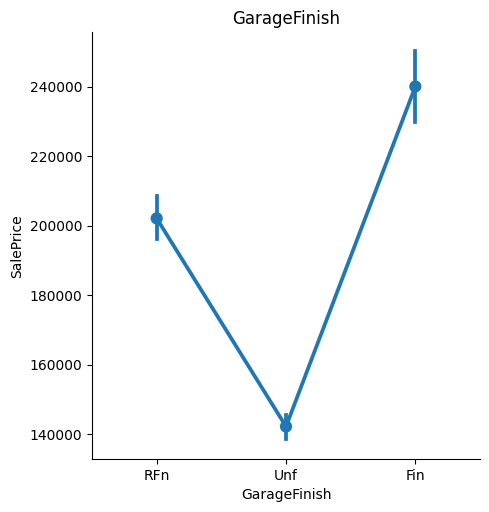

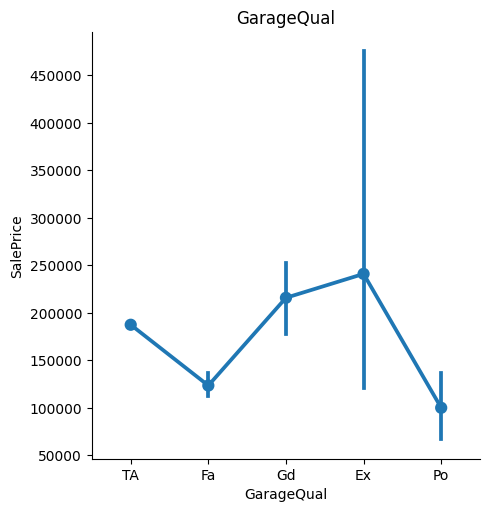

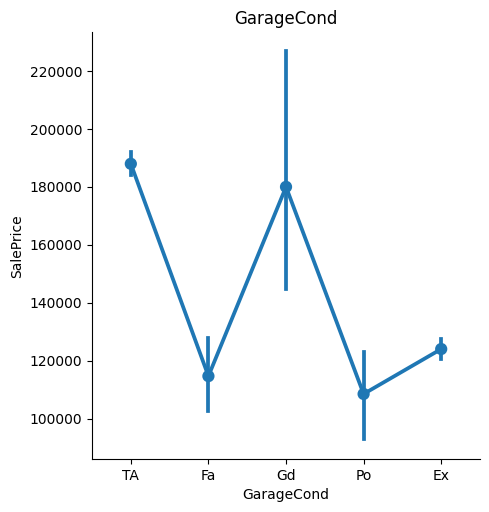

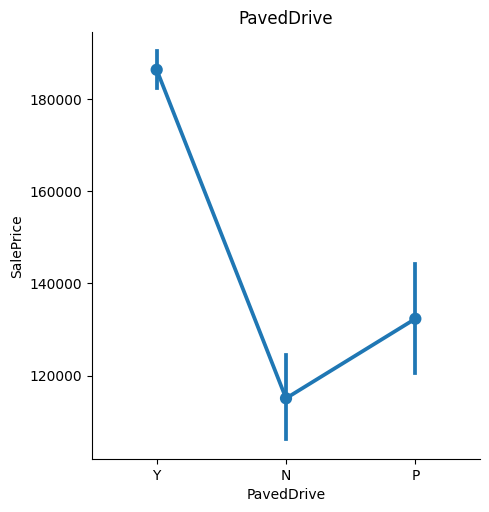

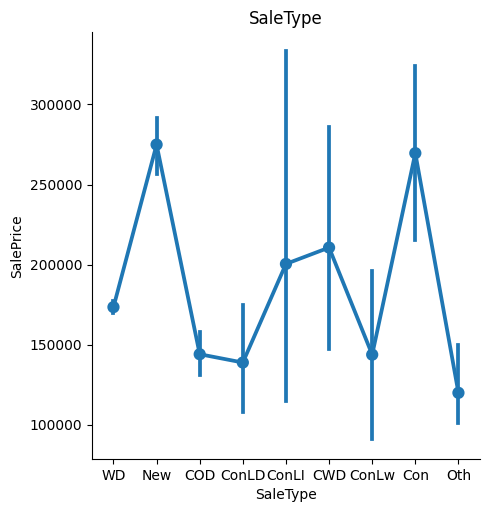

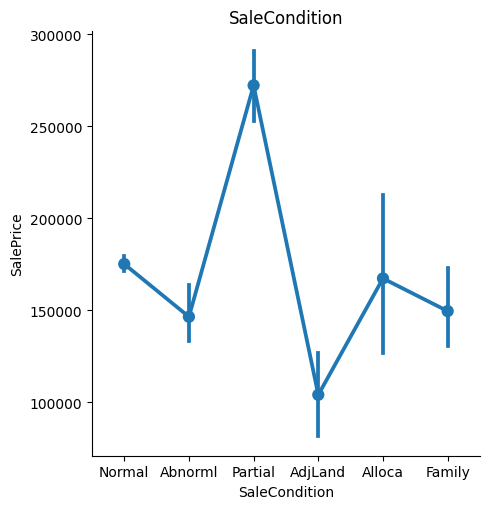

In [14]:
# Catgegorical feature plots

for c in categorical_features.columns:
    sns.catplot(x=c, y ='SalePrice',data=df,kind='point')
    plt.title(c)
    if c in ["Neighborhood","RoofMatl","Exterior1st","Exterior2nd"]:
        plt.xticks(rotation=90)

In [15]:
numerical_features.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [16]:
ordinal_cat = ["Id","OverallQual","OverallCond","YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath",
               "HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars",
               "MoSold","YrSold","SalePrice"]

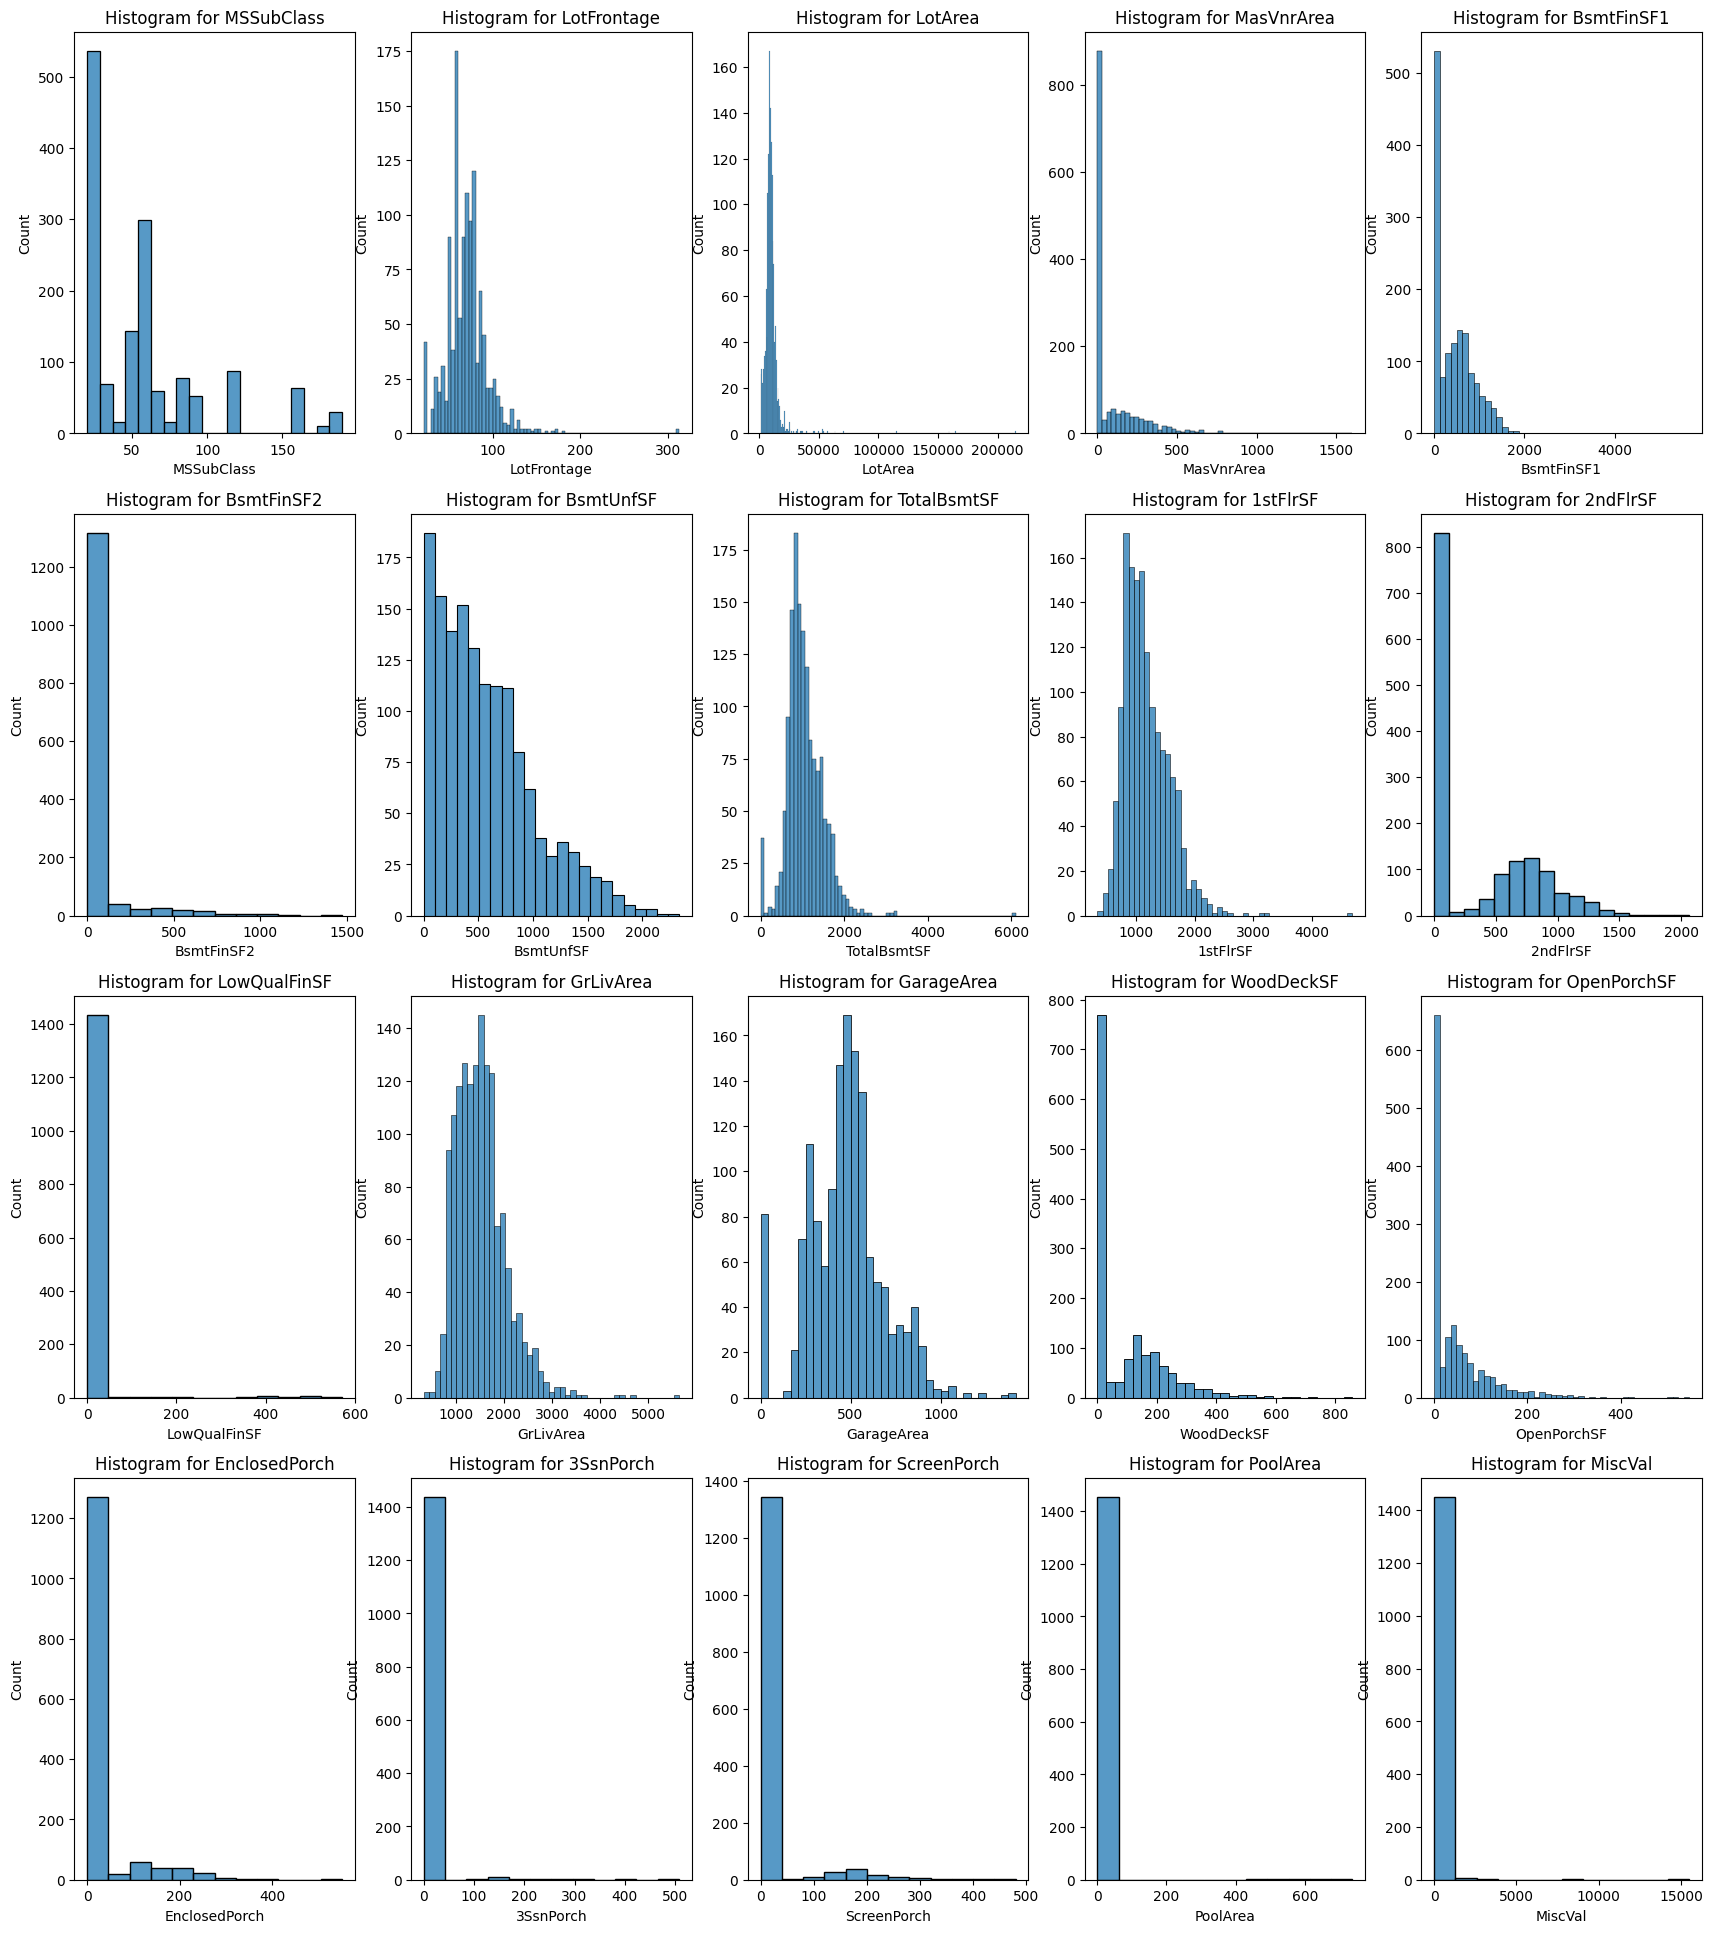

In [17]:
col=1
plt.figure(figsize=(21,24))
for i in numerical_features.columns:
    if i not in ordinal_cat:
        if col<21:
            plt.subplot(4,5,col)
            sns.histplot(x=df[i], kde=False)
            plt.title("Histogram for %s" % (i))
        col += 1

<Figure size 2100x2400 with 0 Axes>

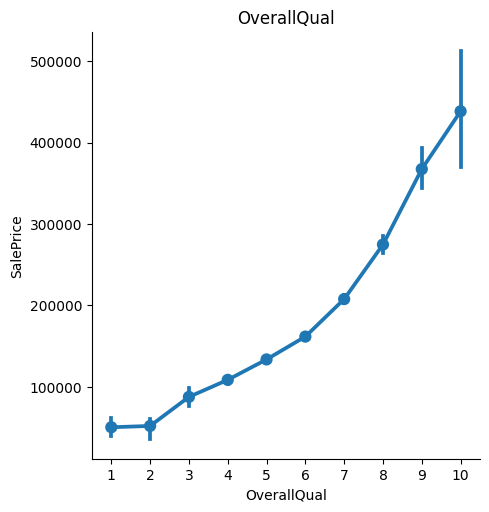

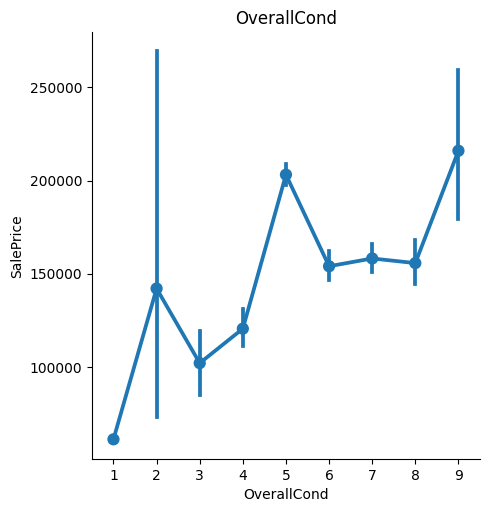

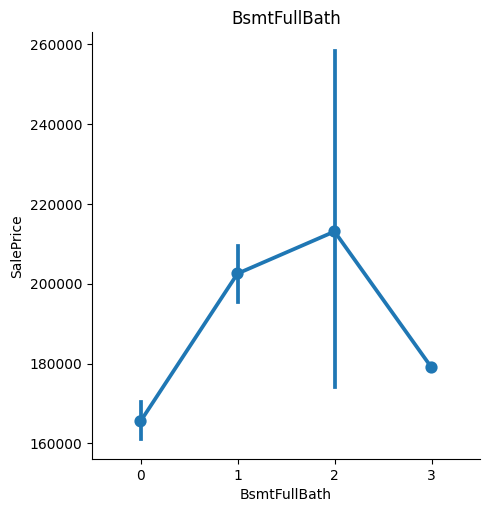

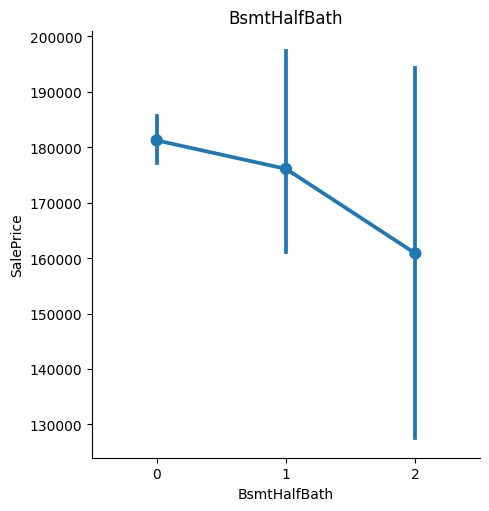

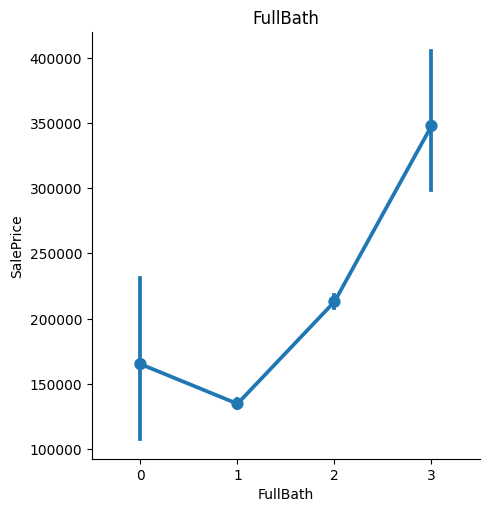

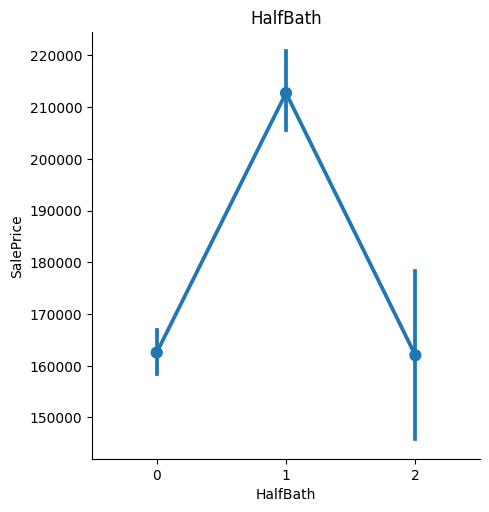

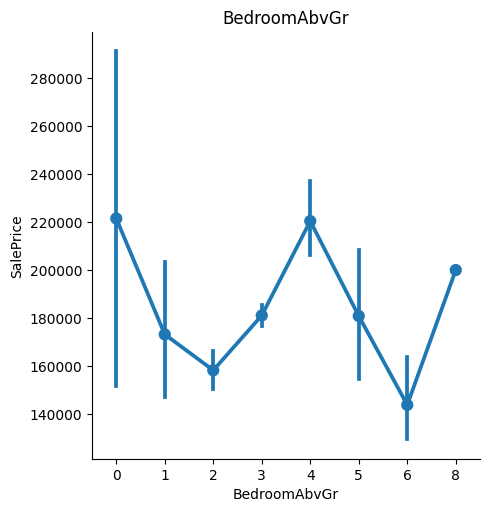

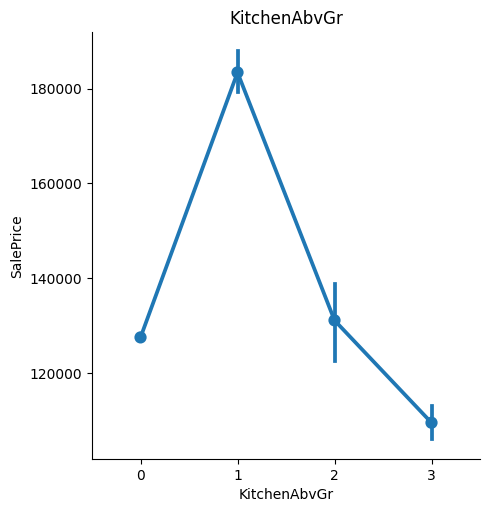

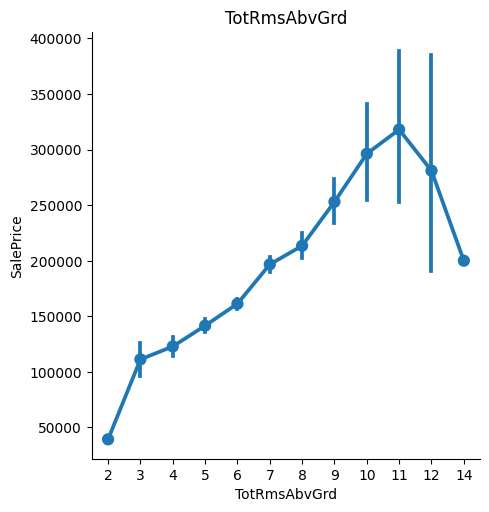

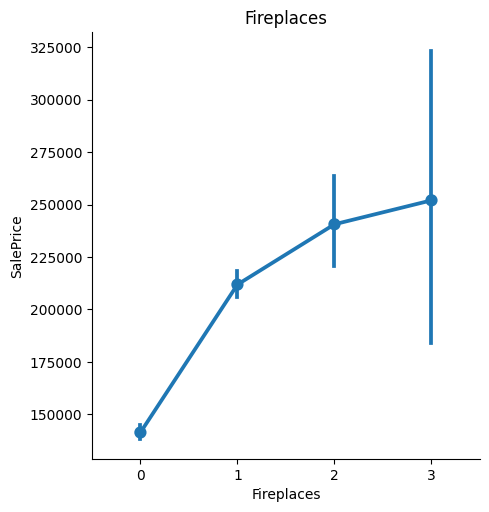

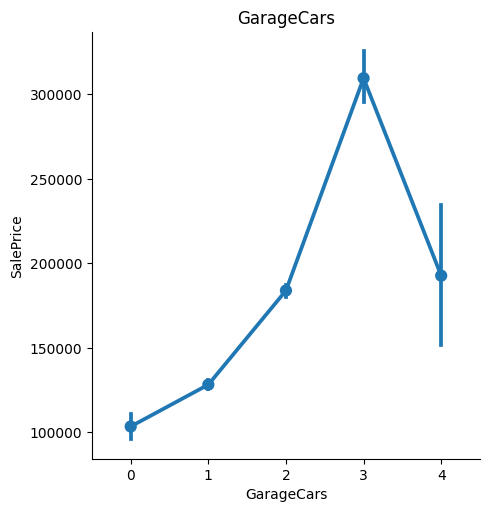

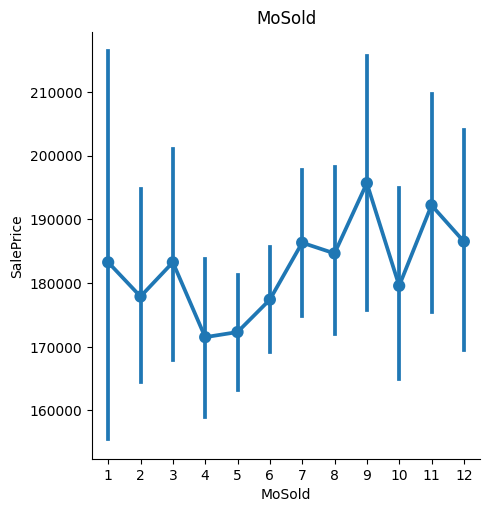

In [18]:
col=1
# fig, axs = plt.subplots(5,3)

plt.figure(figsize=(21,24))
for o in ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
          "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold","YrSold"]:
    if col<13:
        sns.catplot(x=o,y='SalePrice',data=df, kind='point')
        plt.title(o)
    
    col+=1

In [19]:
categorical_features.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [20]:
categorical_features.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

/Users/gayathri/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


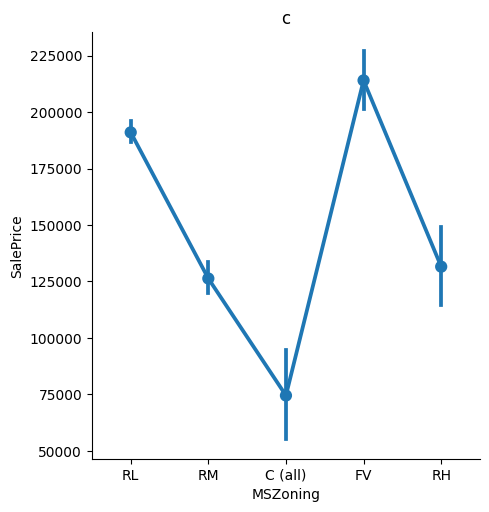

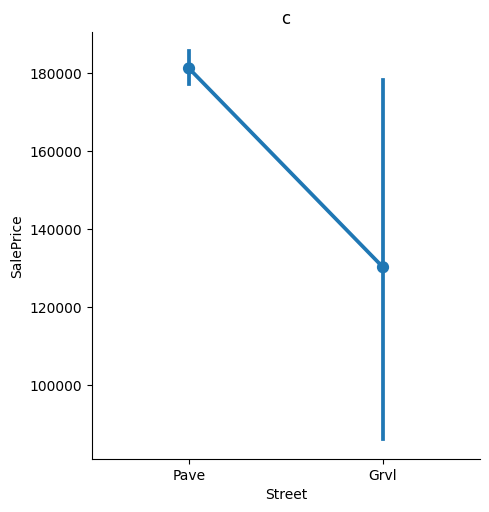

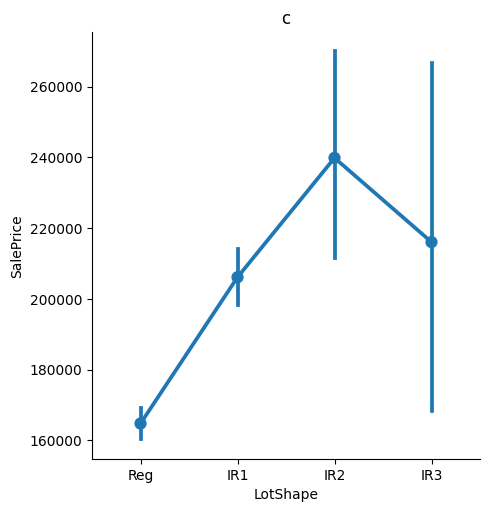

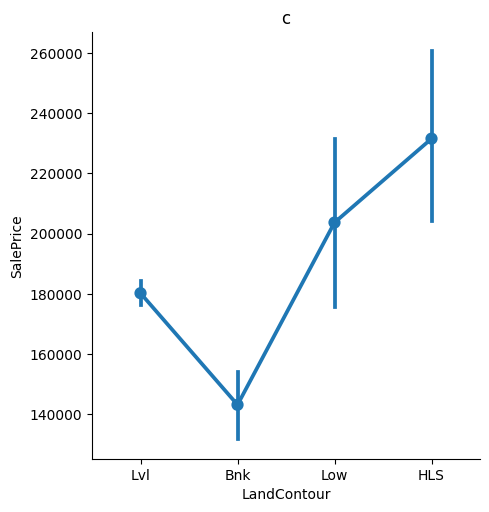

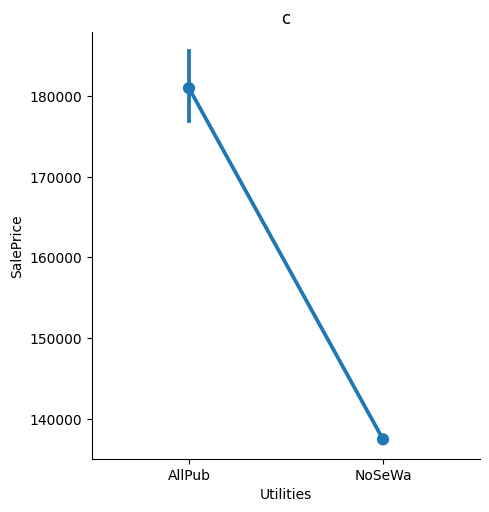

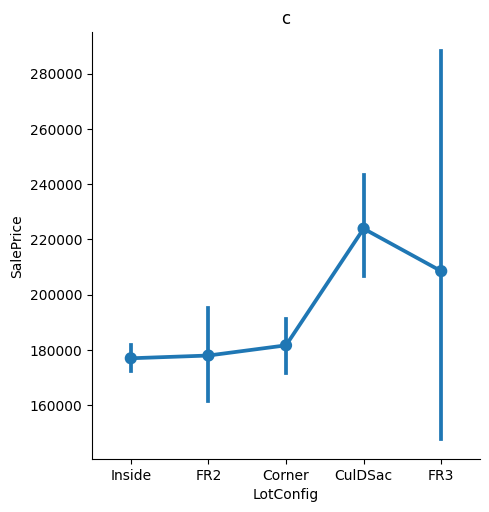

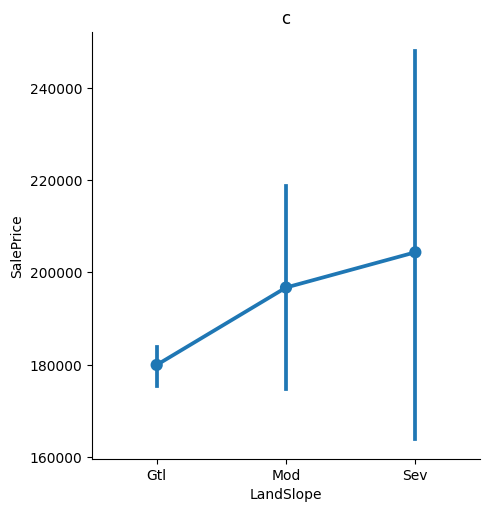

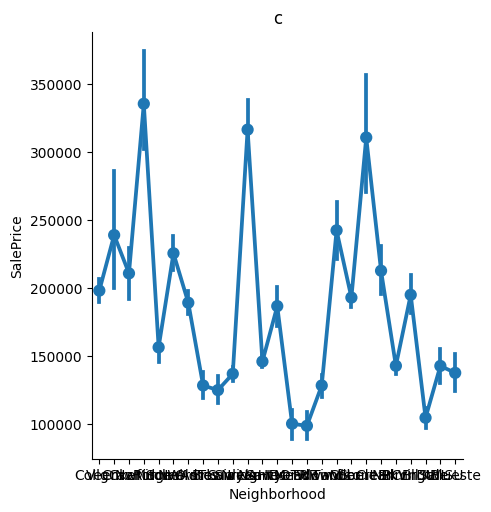

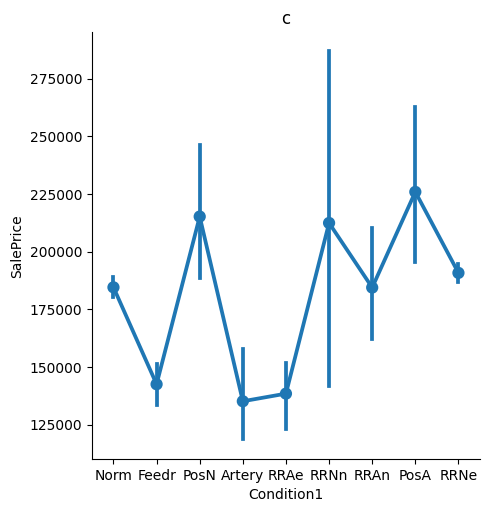

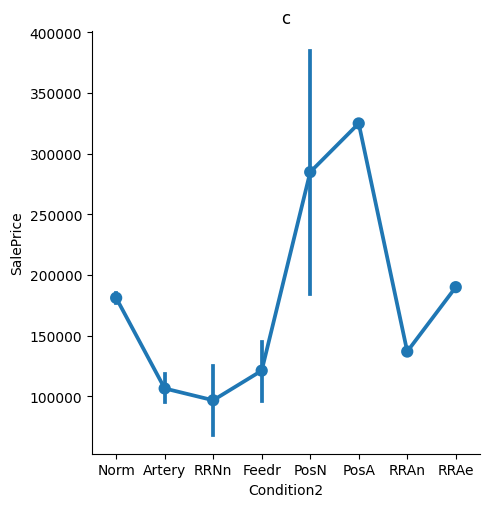

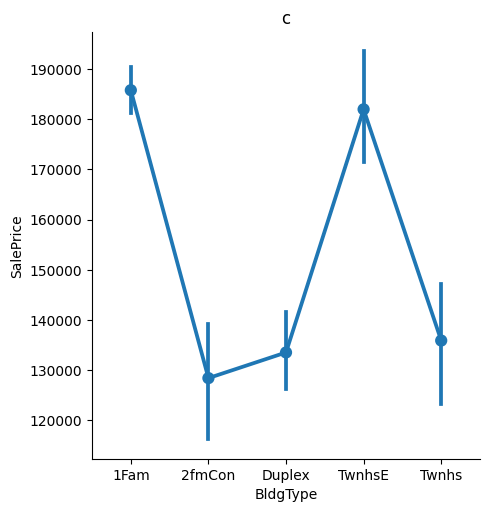

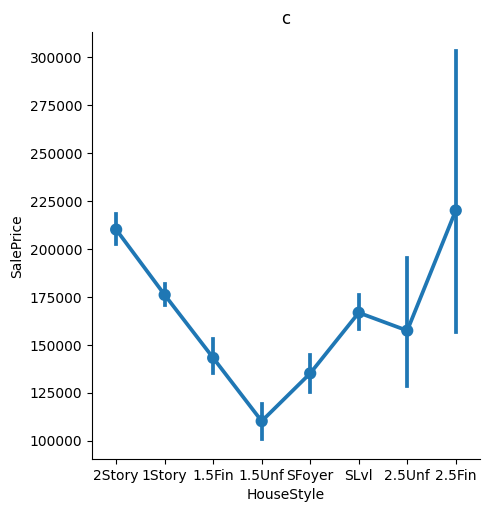

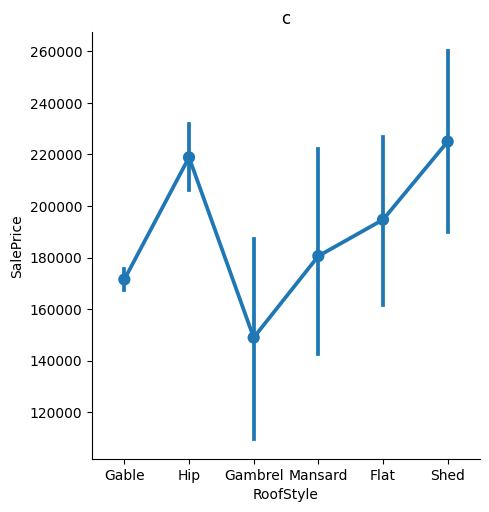

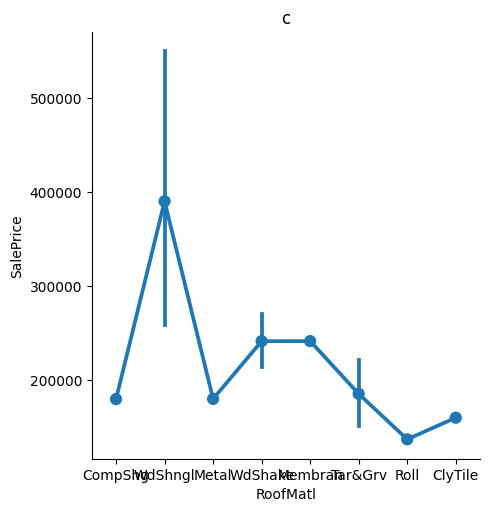

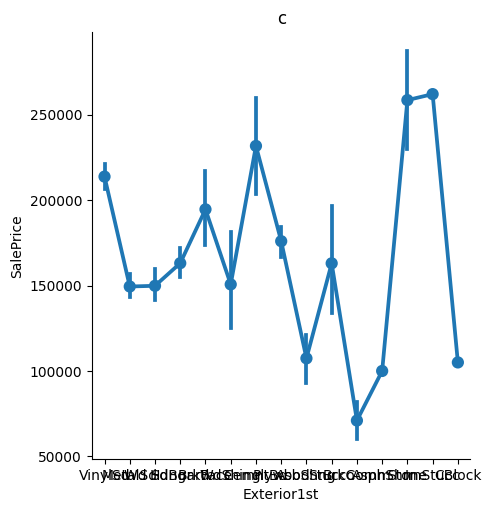

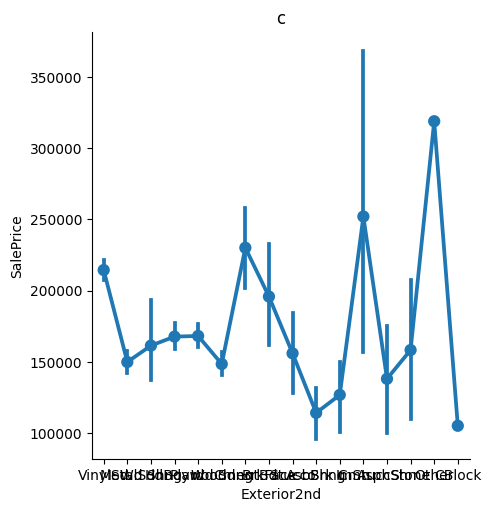

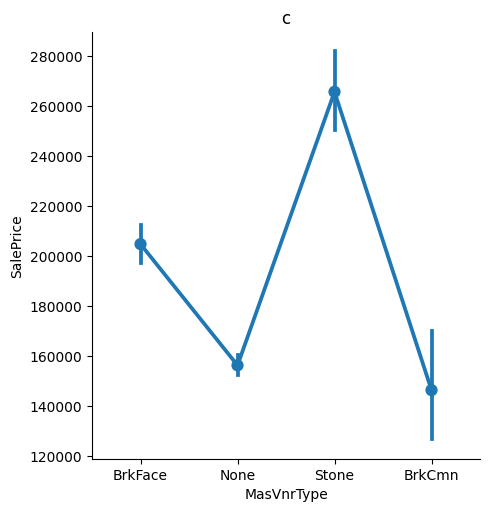

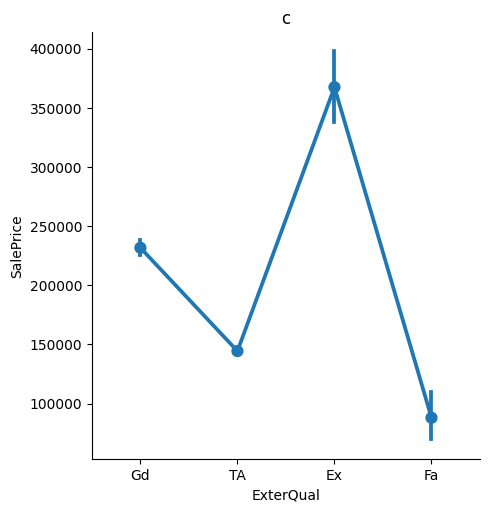

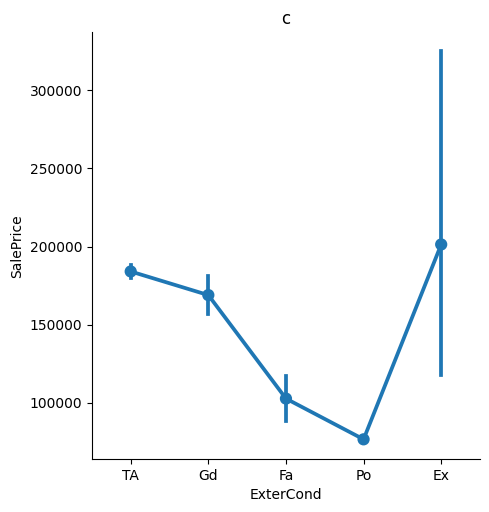

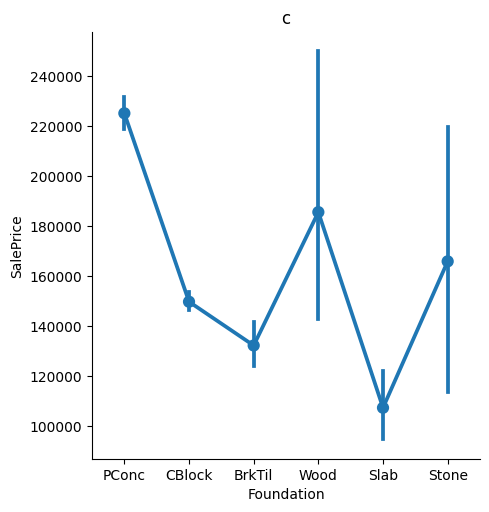

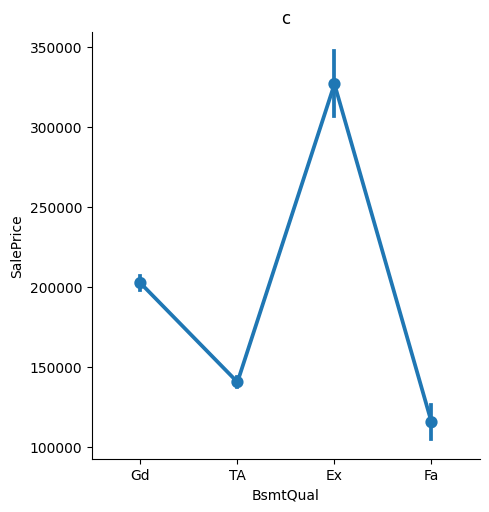

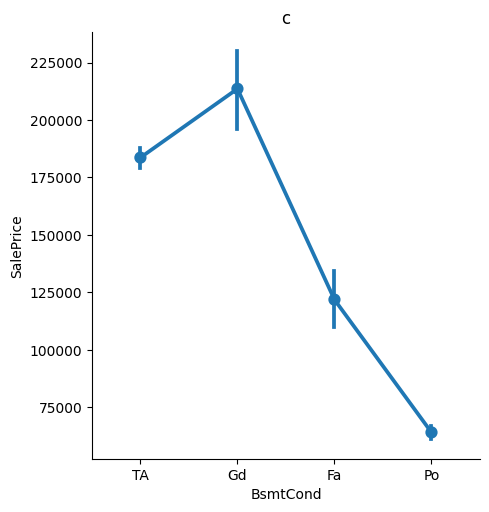

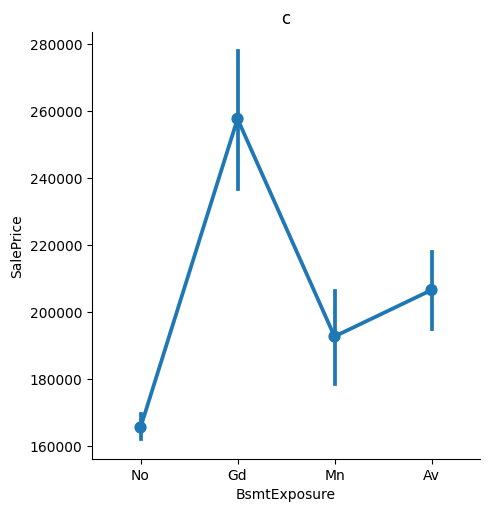

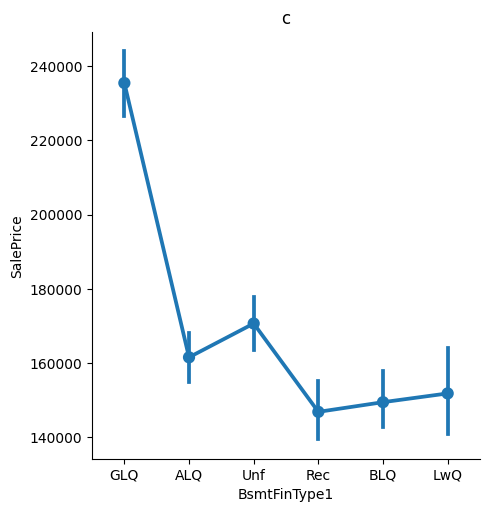

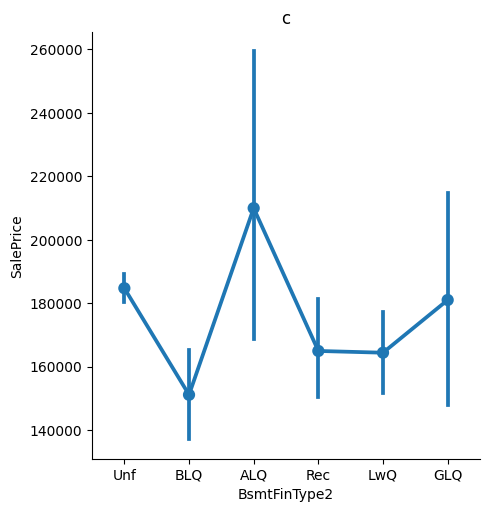

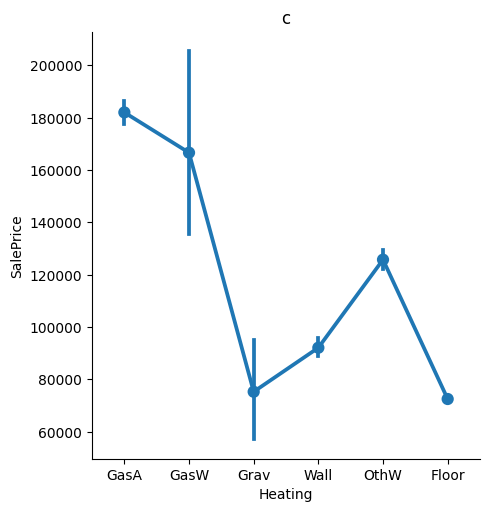

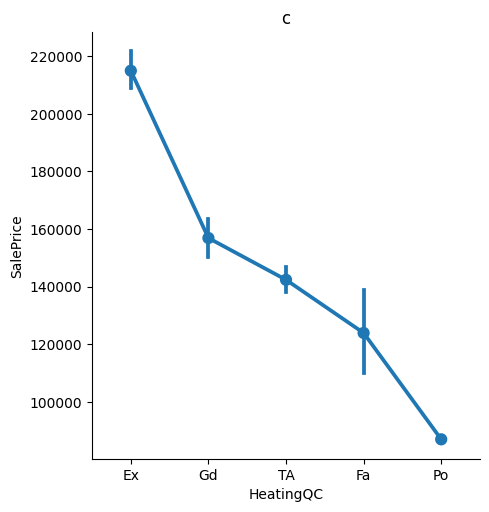

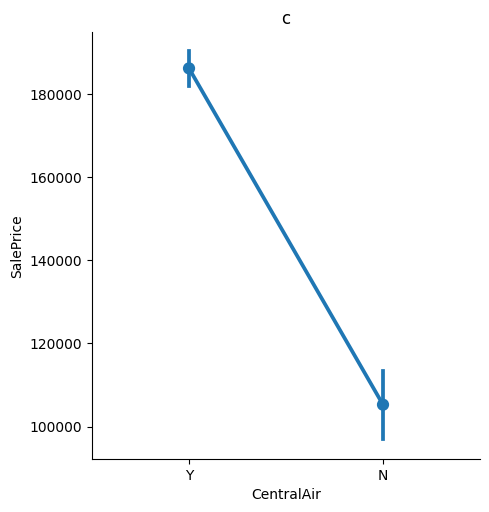

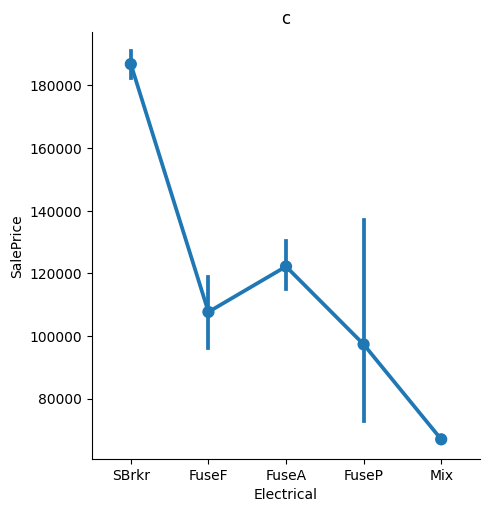

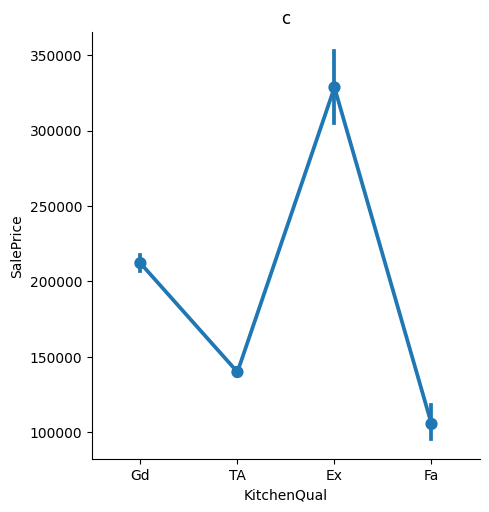

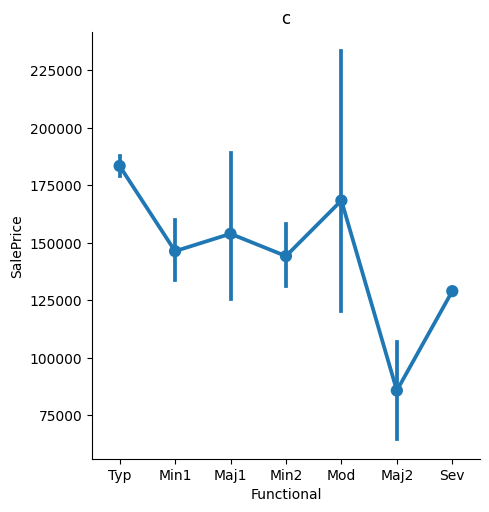

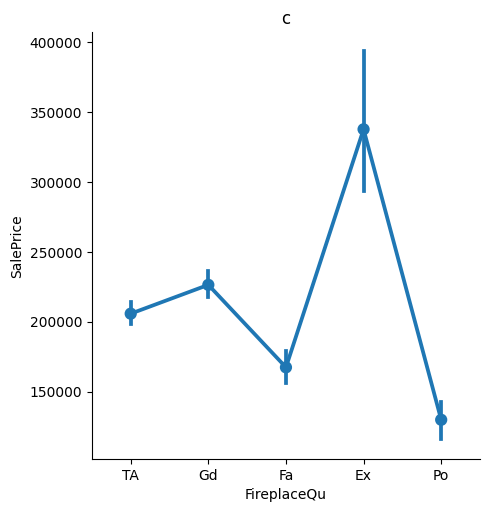

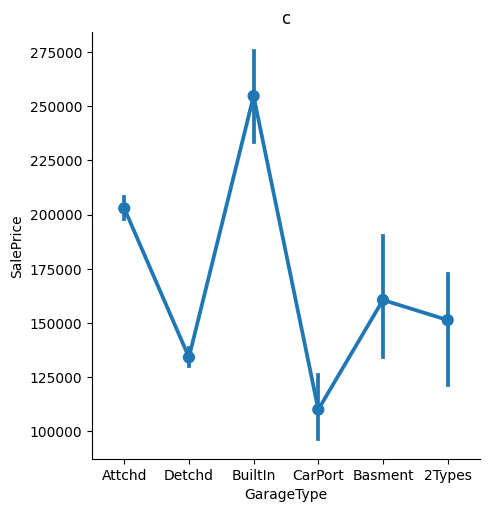

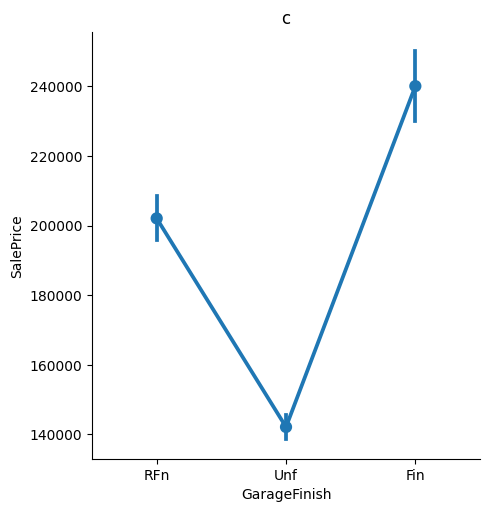

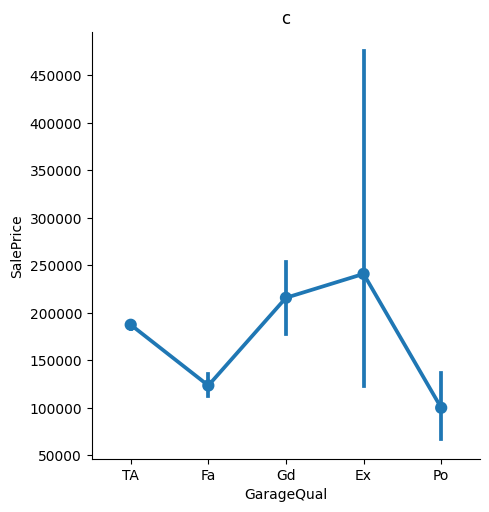

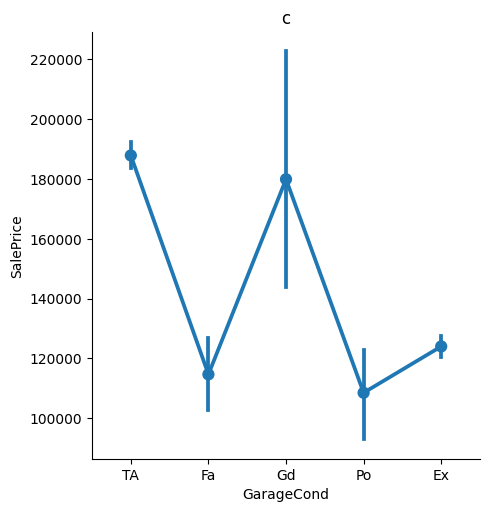

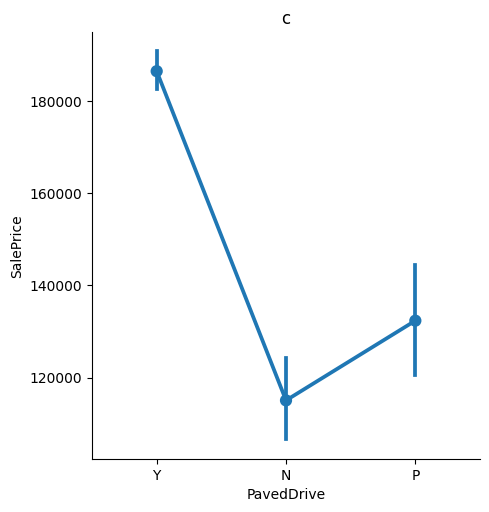

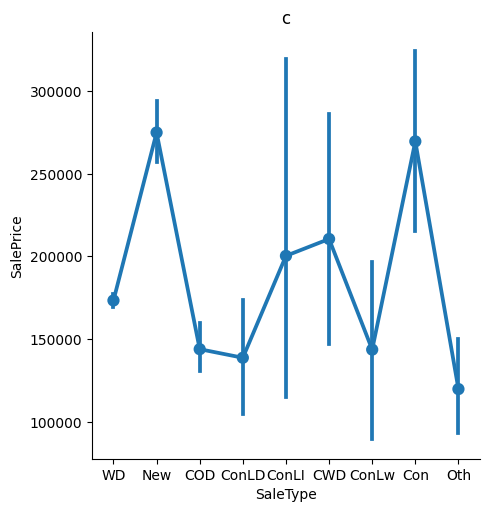

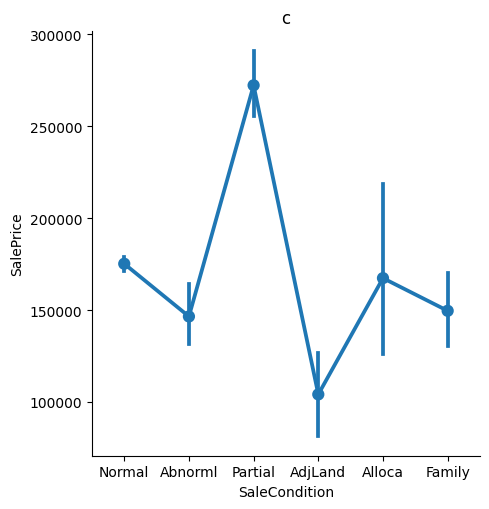

In [21]:
for c in categorical_features.columns:
    sns.catplot(x=c,y='SalePrice',data=df,kind='point')
    plt.title('c')

In [22]:
# Data cleaning
numerical_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
numerical_features=numerical_features.drop(['SalePrice'],axis=1)
numerical_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [24]:
n_features_not_null = numerical_features.isnull().sum()
n_features_not_null[n_features_not_null !=0][:]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [25]:
for n in numerical_features:
    df[n].fillna(df[n].mean(),inplace=True)
    df_test[n].fillna(df_test[n].mean(),inplace=True)

In [26]:
c_features_not_null = categorical_features.isnull().sum()
c_features_not_null[c_features_not_null !=0][:]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [27]:
for c in categorical_features:
    df[c].fillna('None',inplace=True)
    df_test[c].fillna('None',inplace=True)

In [28]:
df.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [29]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [30]:
df.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [31]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

Mean if SalePrice 180921.19589041095
Median if SalePrice 163000.0


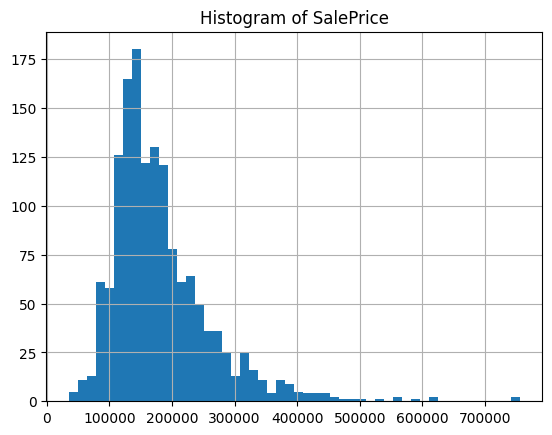

In [32]:
# Price Range

print('Mean if SalePrice',df['SalePrice'].mean())
print('Median if SalePrice',df['SalePrice'].median())

df['SalePrice'].hist(bins=50)
plt.title('Histogram of SalePrice')
plt.show()

### Area related to price analysis

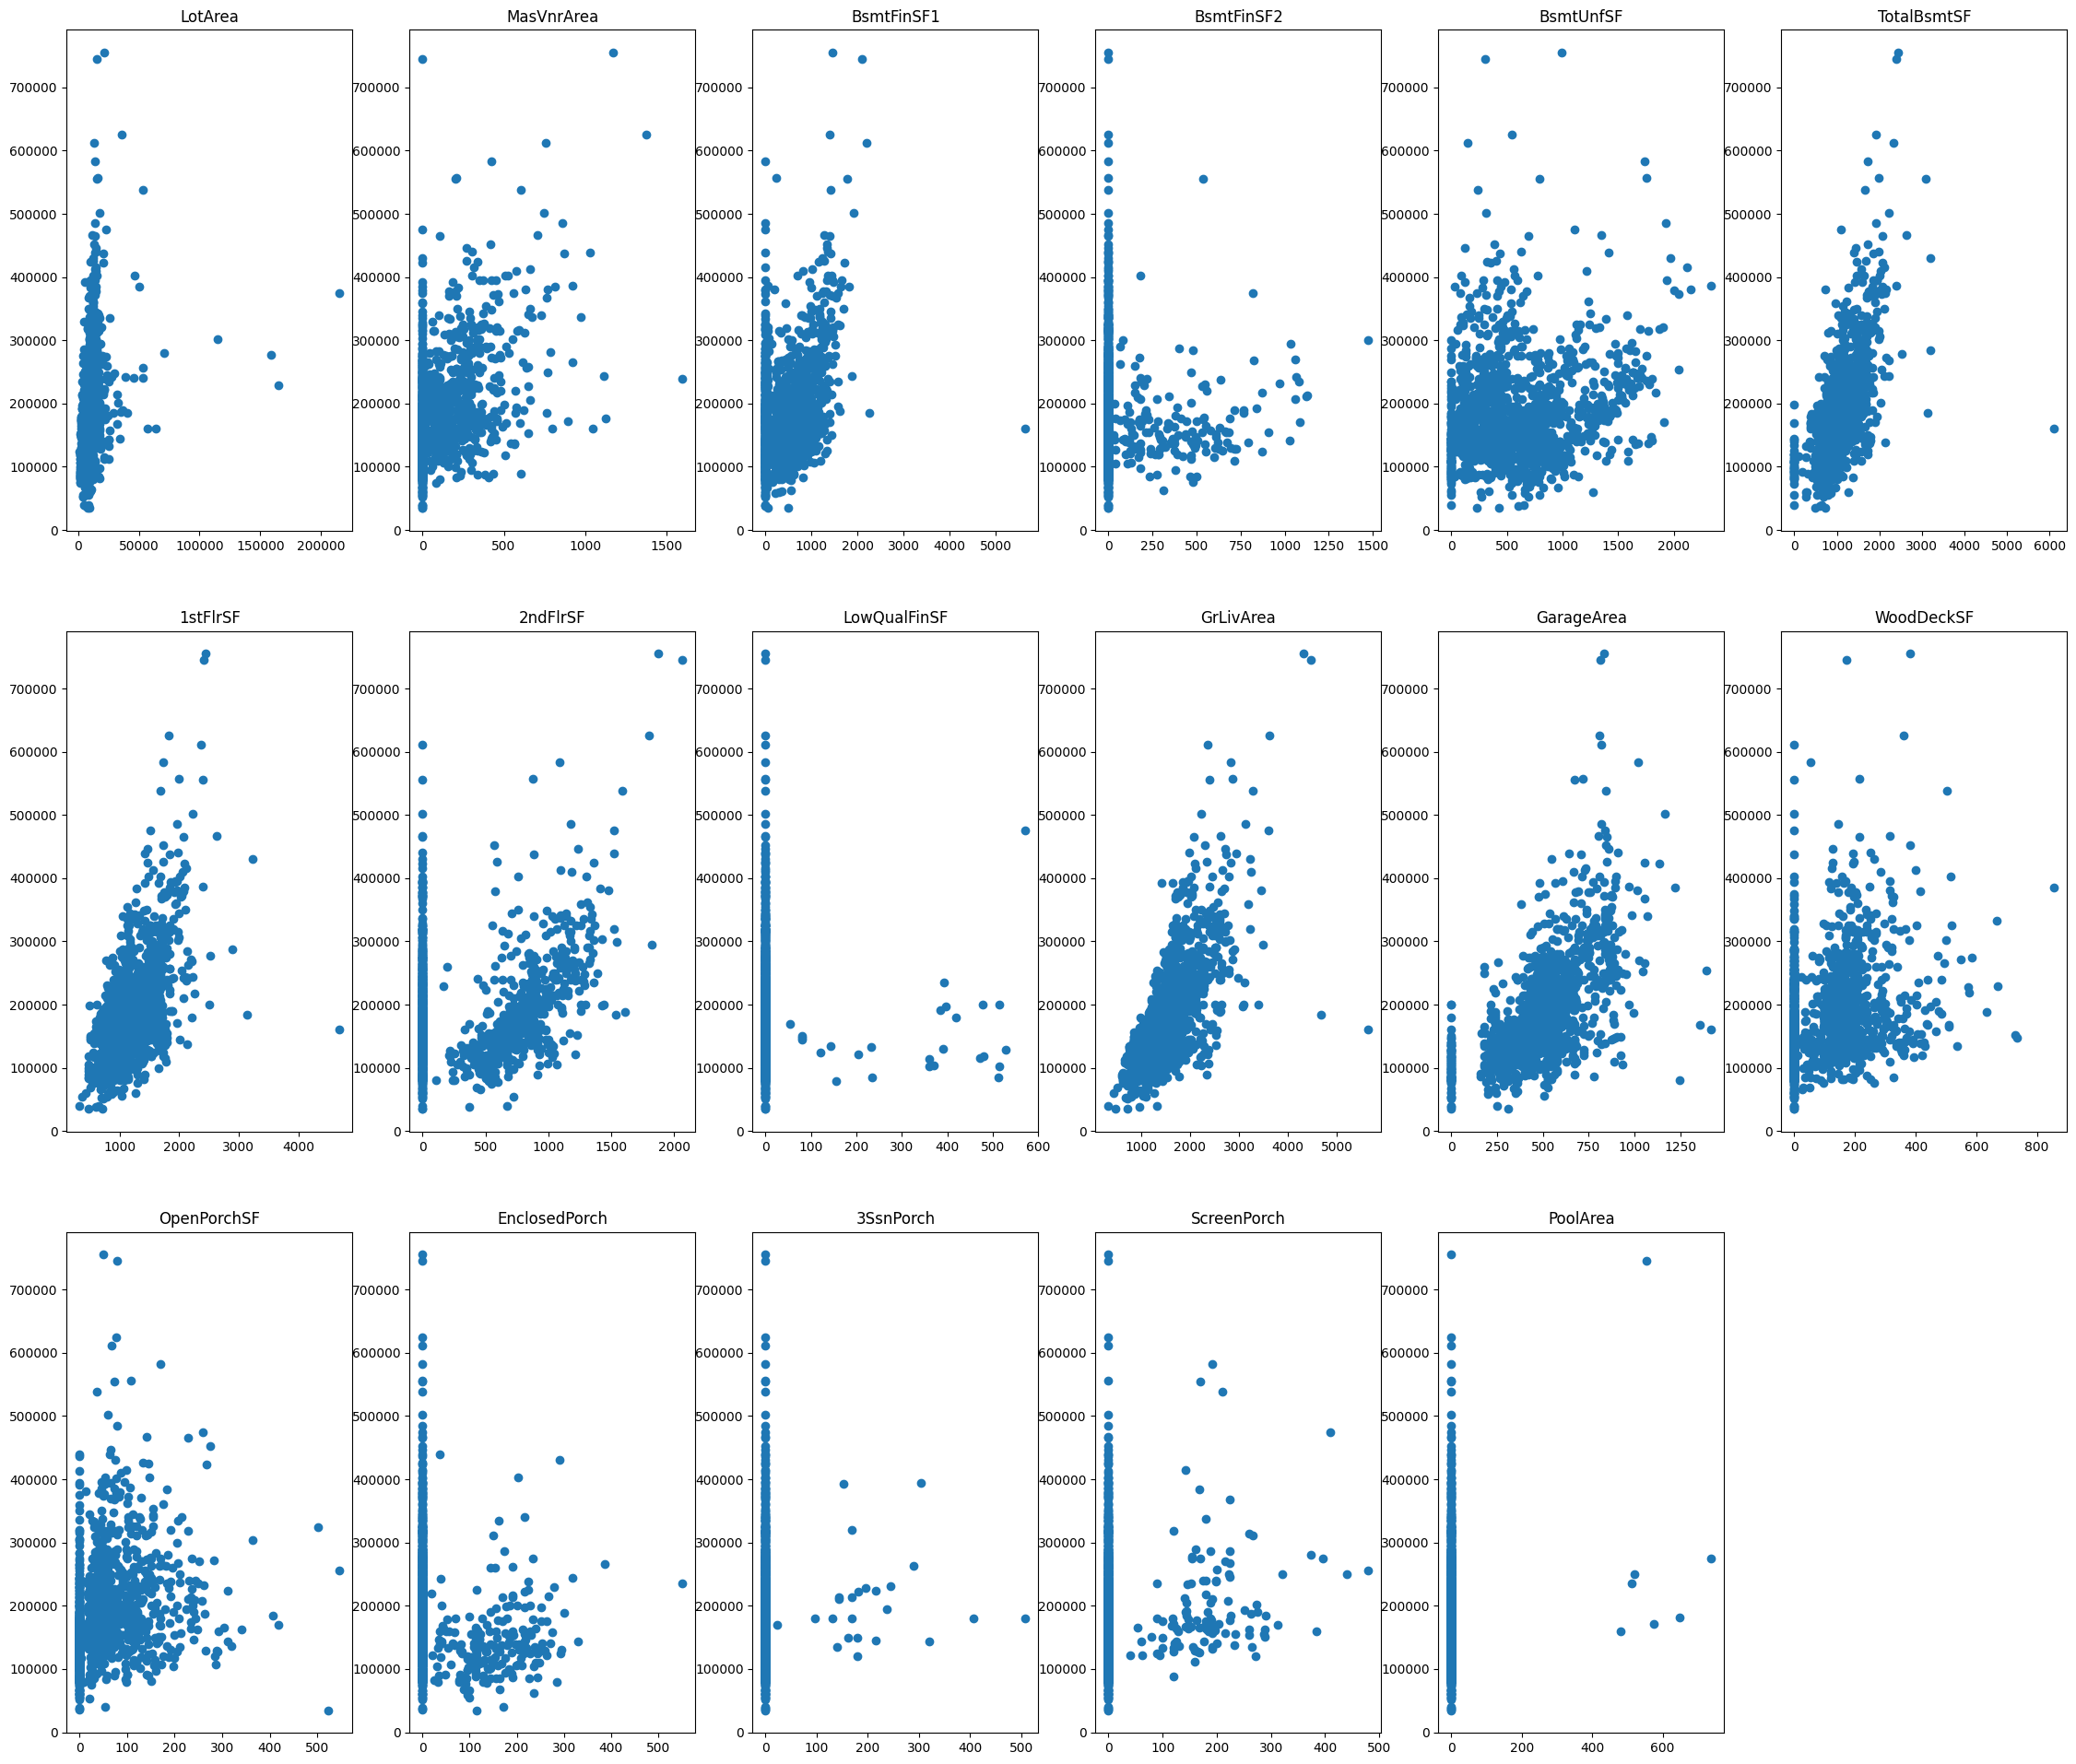

In [33]:
# Area related to price

plt.figure(figsize=(28,24))
lables = ["LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
          "LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch",
          "ScreenPorch","PoolArea"]

col=1
for i in lables:
    if col<=len(lables):
        plt.subplot(3,6,col)
        plt.scatter(x=i,y='SalePrice',data=df)
        plt.title(i)
    col+=1

It is clear from the above plots that all area related features except PoolArea and 3SsnPorch have a positive correlation with SalePrice

### Quality related to price analysis

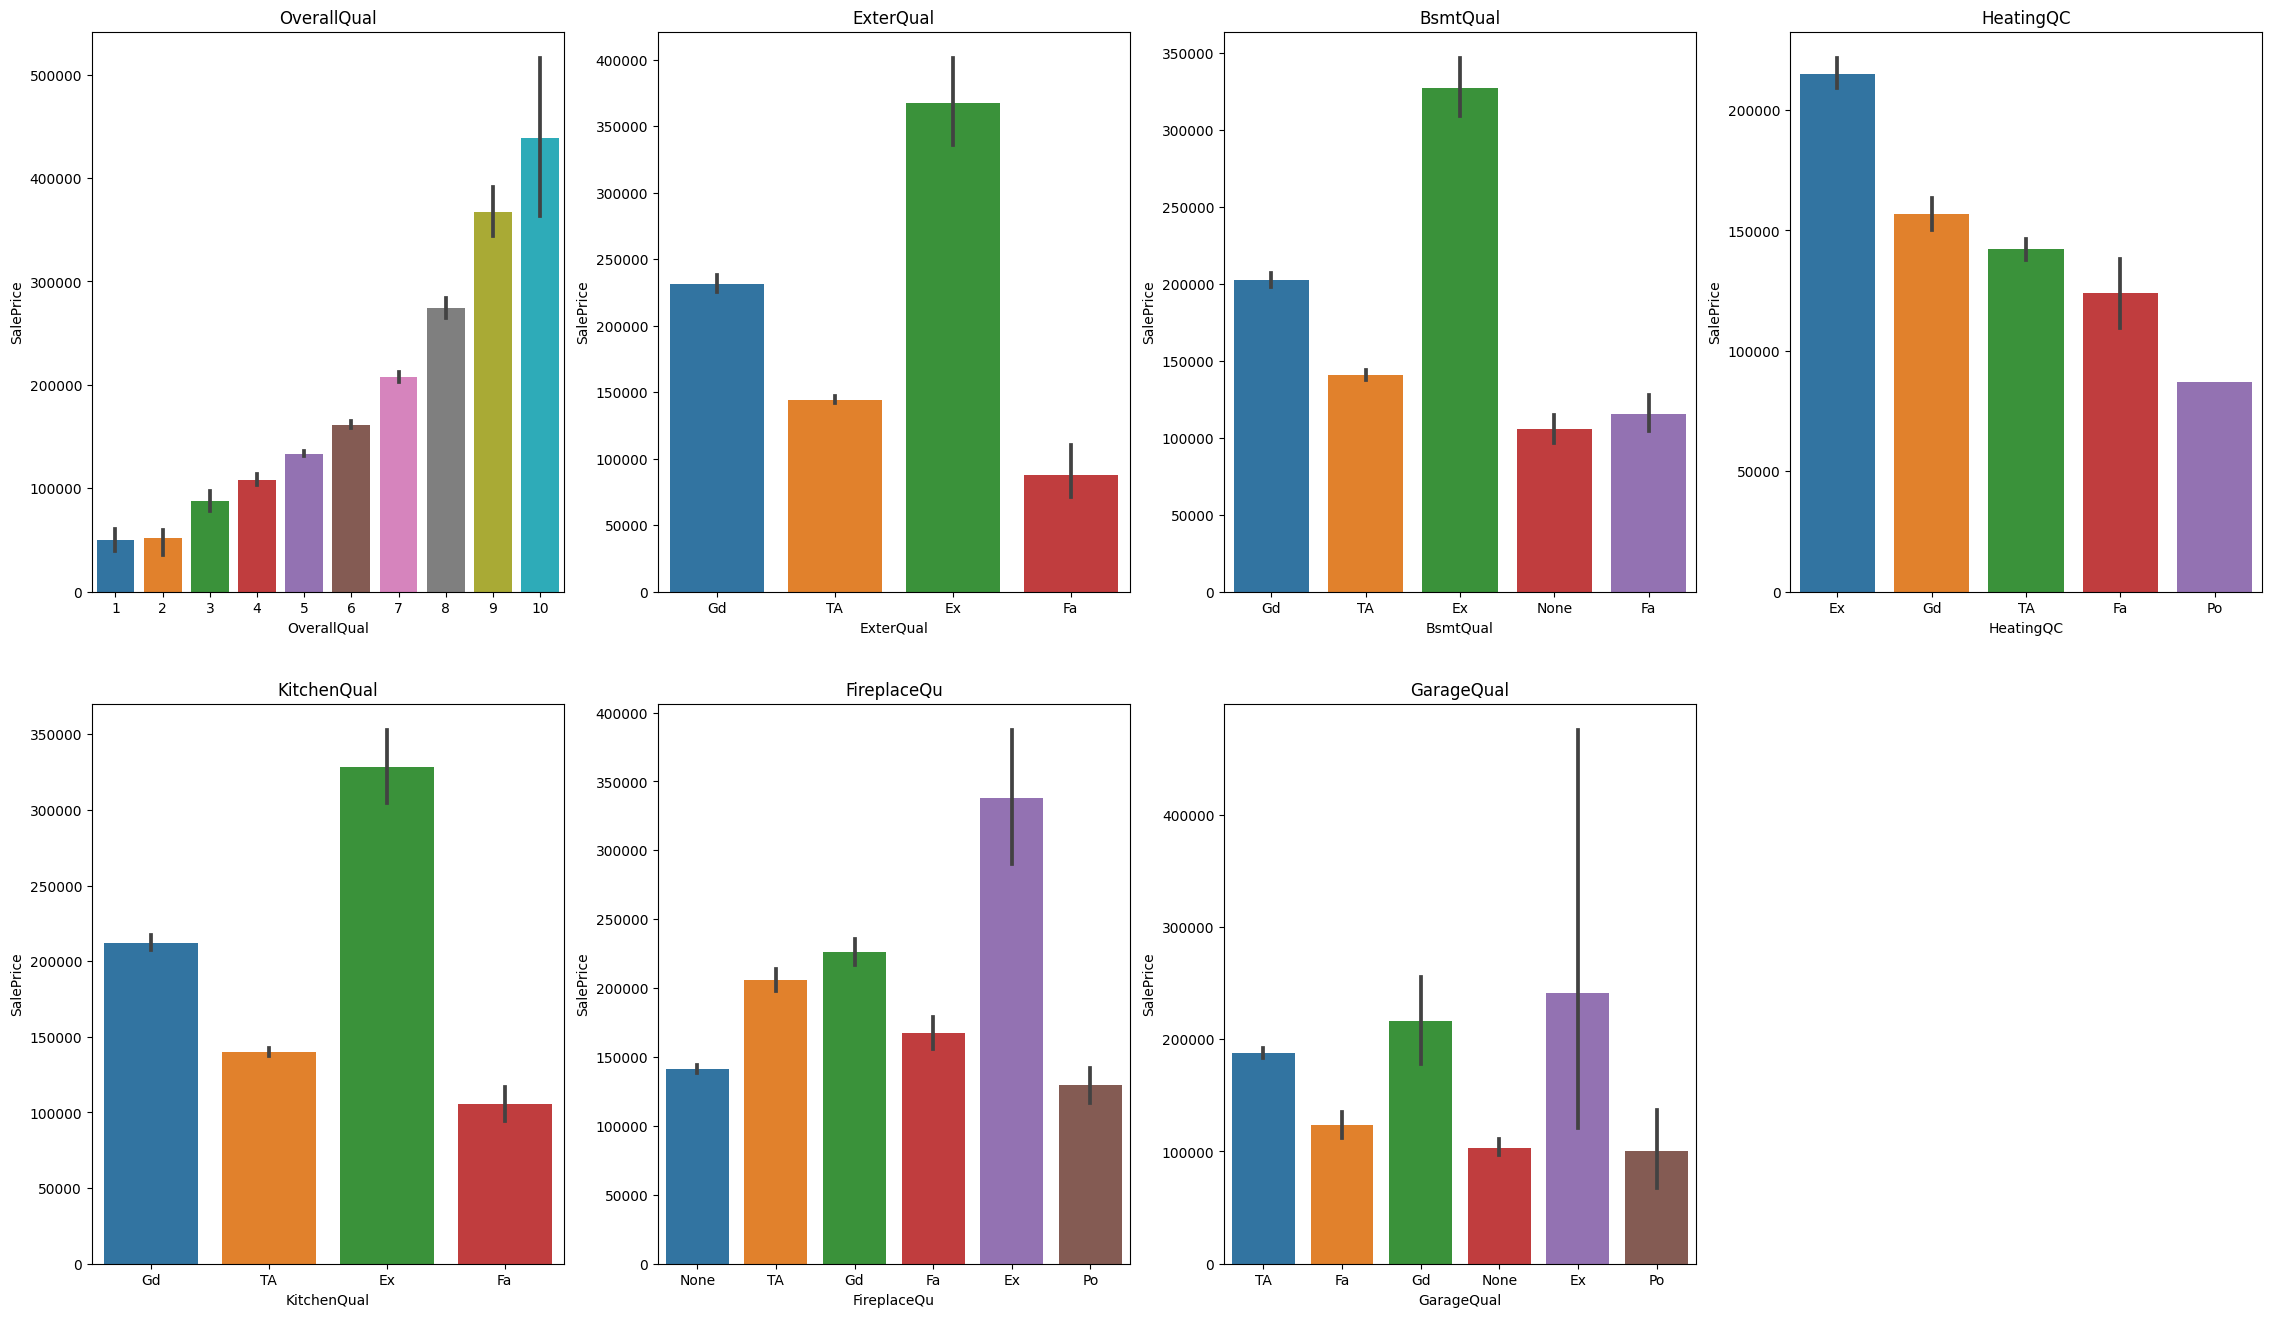

In [34]:
# Quality relation to price

plt.figure(figsize=(28,16))
lables = ["OverallQual","ExterQual","BsmtQual","HeatingQC","KitchenQual","FireplaceQu","GarageQual"]
col = 1

for i in lables:
    if col<8:
        plt.subplot(2,4,col)
        sns.barplot(x=i, y="SalePrice", data=df)
        plt.title(i)
    col = col+1

Houses with Quality Ex and Gd have higher SalePrice than the rest

### Condition related to price analysis

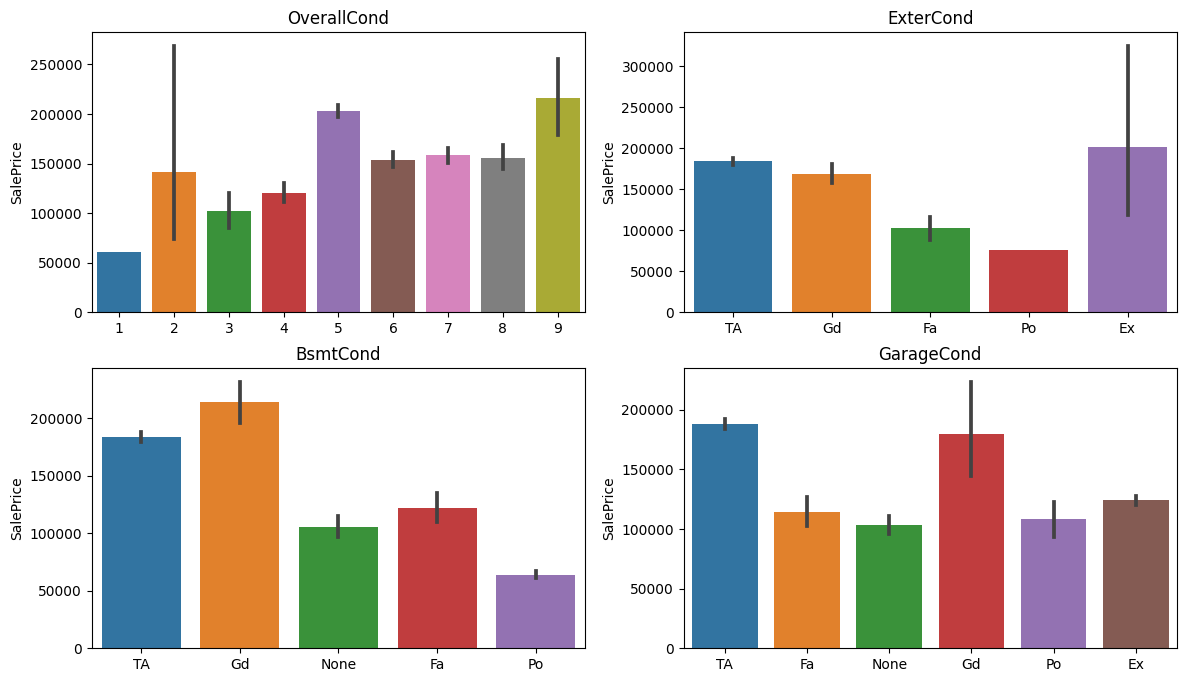

In [35]:
# Condition vs Saleprice

plt.figure(figsize=(14,8))
lables = ["OverallCond","ExterCond","BsmtCond","GarageCond"]
col = 1

for i in lables:
    if col<5:
        plt.subplot(2,2,col)
        sns.barplot(x=i, y="SalePrice", data=df).set(xlabel=None)
        plt.title(i)
    col = col+1

It can be understood that all houses with condition Gd or Ex has higher SalePrice.

### Number of Bathroom related to price analysis

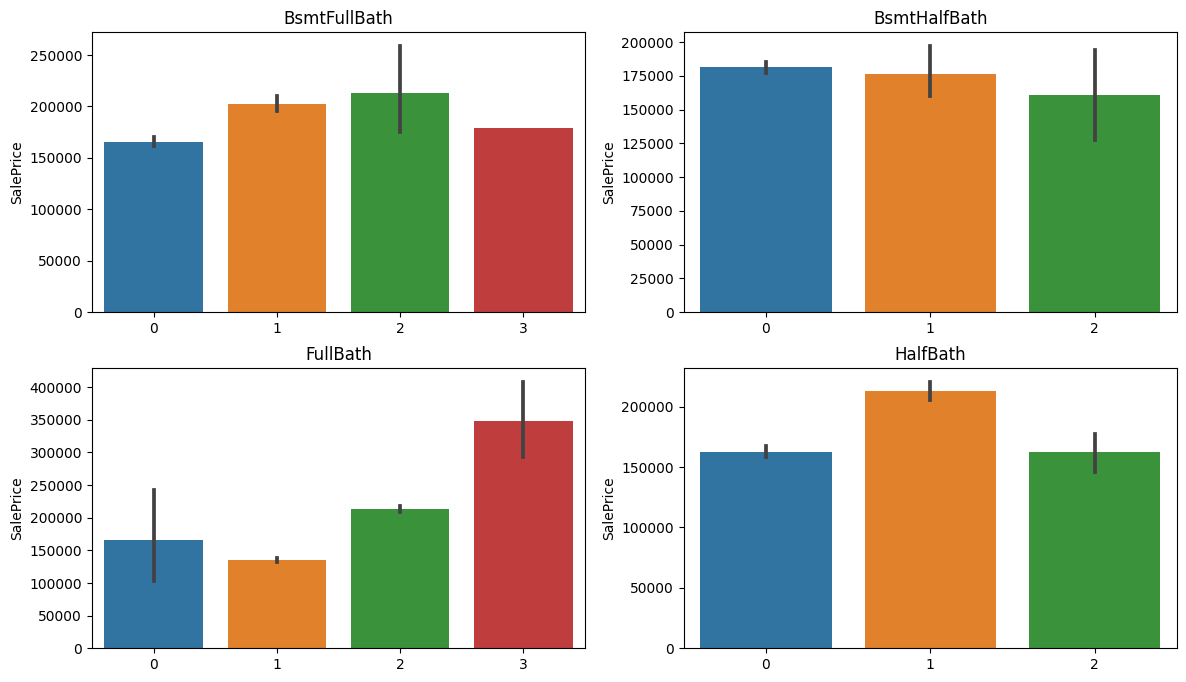

In [36]:
#Bathroom vs price

plt.figure(figsize=(14,8))
lables = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]
col = 1

for i in lables:
    if col<5:
        plt.subplot(2,2,col)
        sns.barplot(x=i, y="SalePrice", data=df).set(xlabel=None)
        plt.title(i)
    col = col+1

Houses with more full bath has higher price than the rest

### Year and Month of sale related to price analysis

In [38]:
# Year and months House are sold

year_sold = df.YrSold.value_counts().sort_index()
year_sold

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

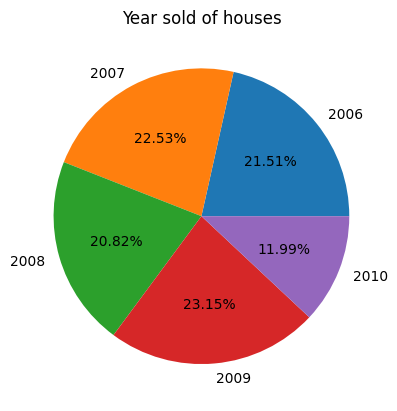

In [39]:
plt.pie(year_sold,labels=list(year_sold.index),autopct="%.2f%%")
plt.title('Year sold of houses')
plt.show()

Most houses were sold in 2009 and there is a dip in sales in 2009-2020

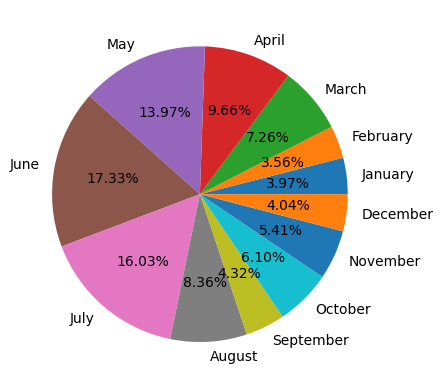

In [40]:
monthsold = ["January","February","March","April","May","June","July",
             "August","September","October","November","December"]
month_sold=df.MoSold.value_counts().sort_index()
plt.pie(month_sold,labels=monthsold,autopct='%.2f%%')
plt.show()

The most sales were made in the month of June and minimum in February

### Neigborhood related to price analysis

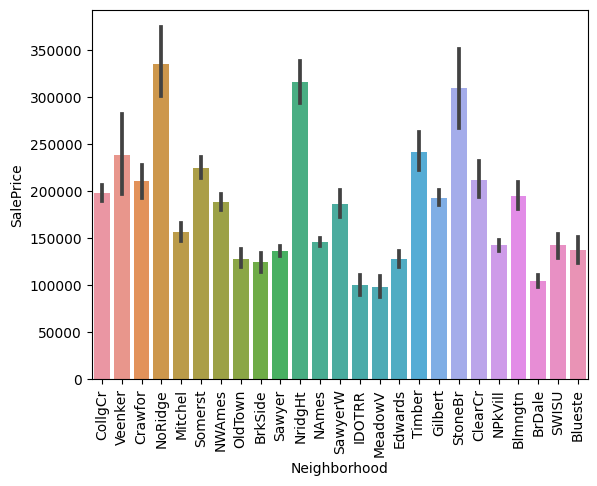

In [41]:
sns.barplot(x='Neighborhood',y='SalePrice',data=df)

plt.xticks(rotation=90)
plt.show()

Price of houses in Neighbourhoods NoRidge, NridgHt are StoneBr are higher than the rest

### Buiding type and house styles related to price analysis

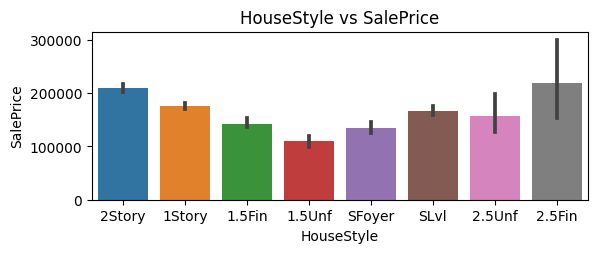

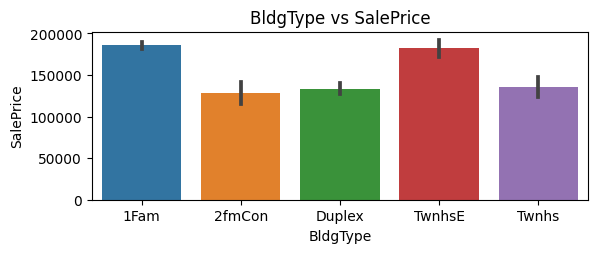

In [42]:


labels =['HouseStyle','BldgType']
col=1

for i in labels:
    if col<3:
        plt.subplot(2,1,col)
        sns.barplot(x=i,y='SalePrice',data=df)
        plt.title(i+' vs SalePrice')
        plt.show()
    col+=1

### Roof related to price analysis

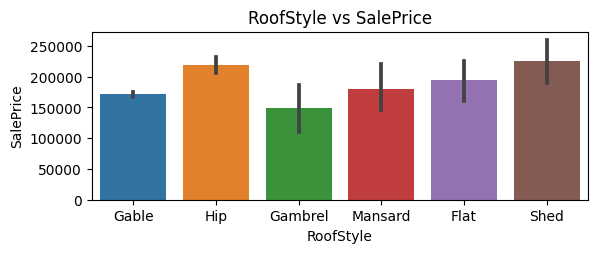

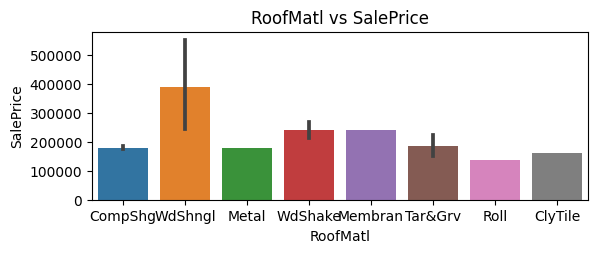

In [43]:
# Roof 

labels= ['RoofStyle','RoofMatl']
col=1

for i in labels:
    if col<3:
        plt.subplot(2,1,col)
        sns.barplot(x=i,y='SalePrice',data=df)
        plt.title(i+' vs SalePrice')
        plt.show()
    col+=1

### Basement related to price analysis

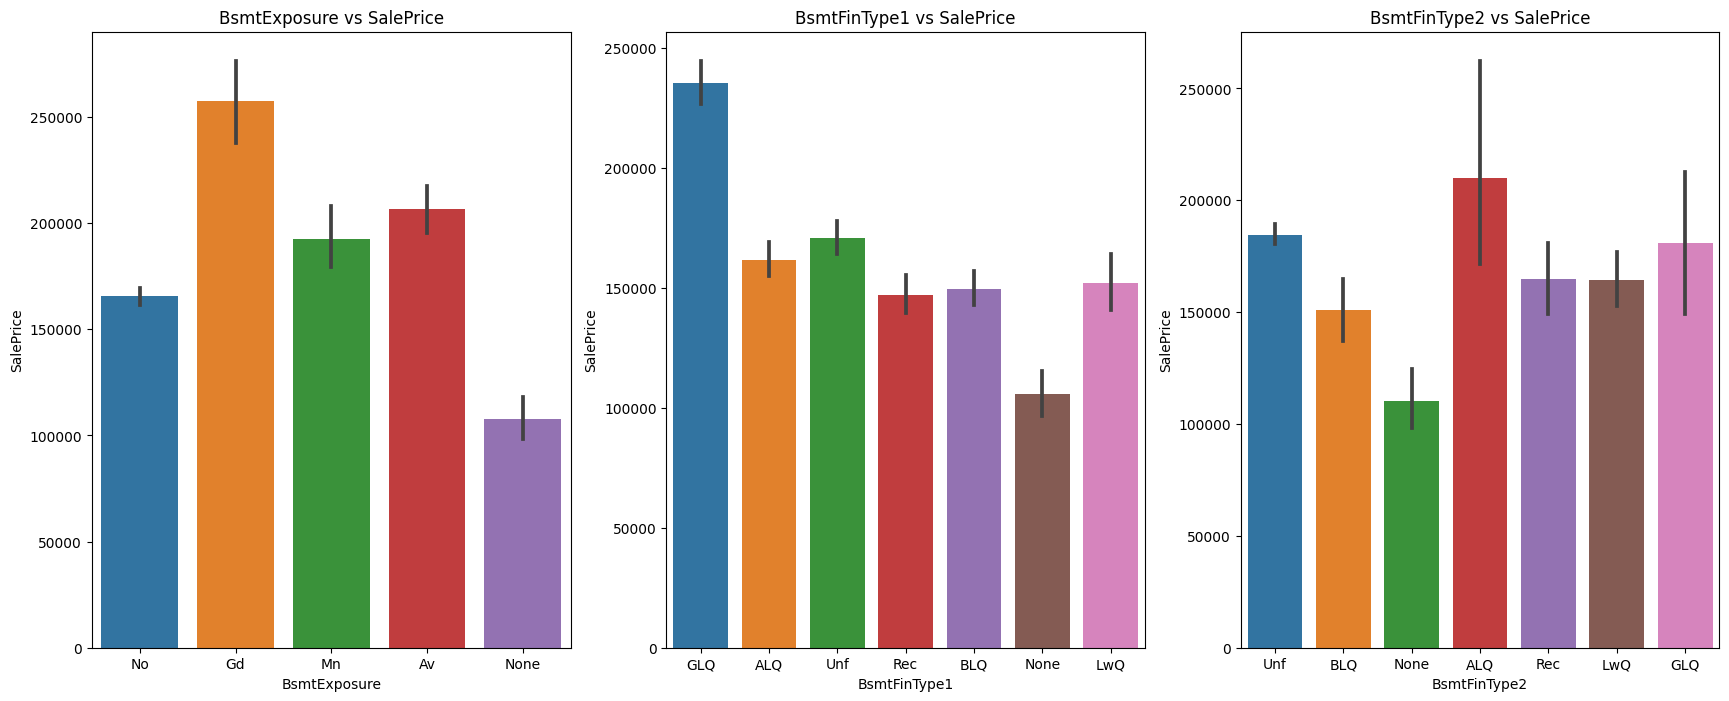

In [44]:
# Basement 
lables = ["BsmtExposure","BsmtFinType1","BsmtFinType2"]
col=1
plt.figure(figsize=(21,8))
for i in lables:
    if col<4:
        plt.subplot(1,3,col)
        sns.barplot(x=i,y='SalePrice',data=df)
        plt.title(i+' vs SalePrice')
        
    col+=1

### Garage related to price analysis

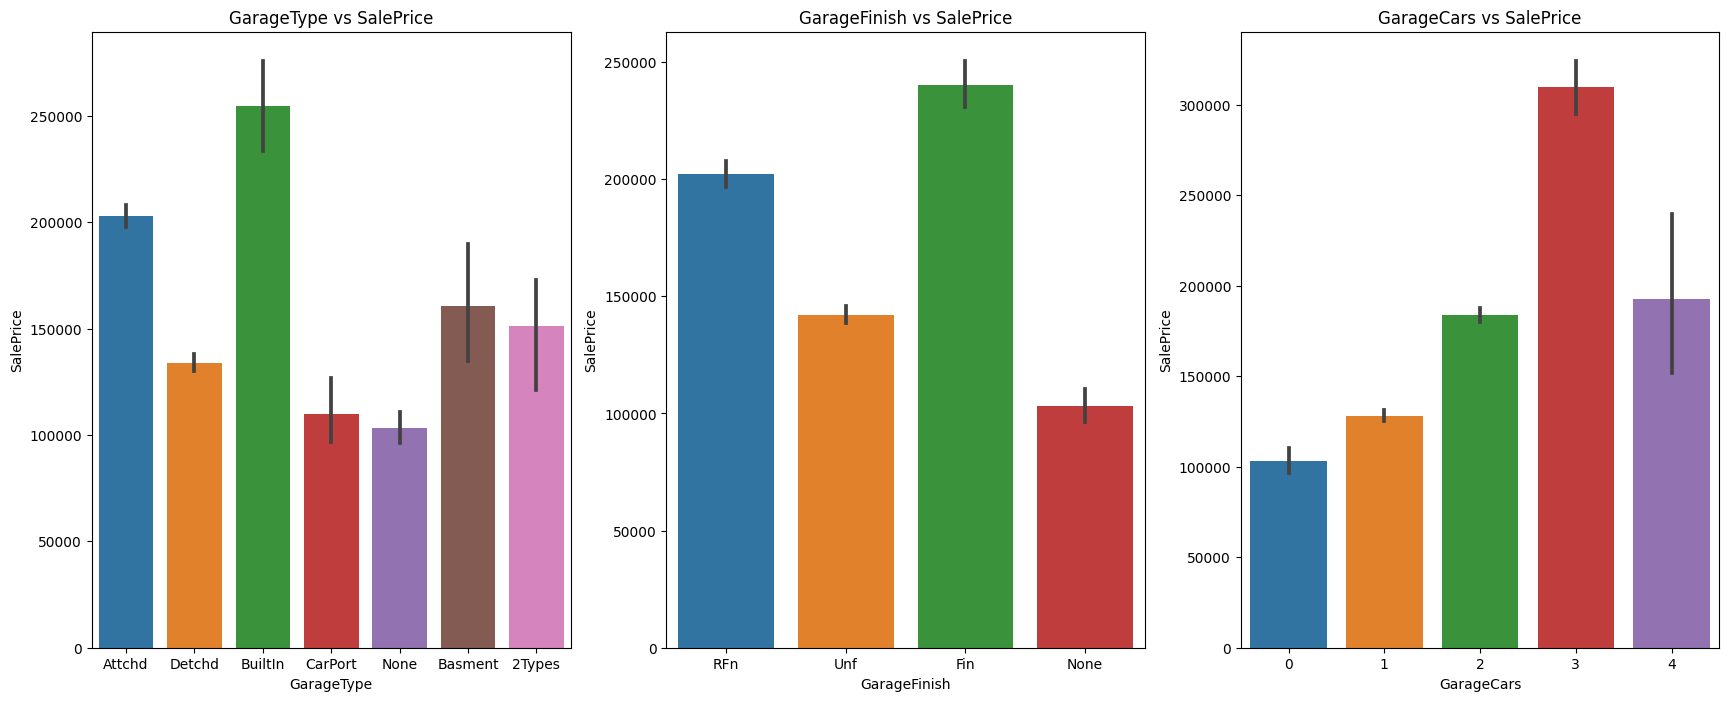

In [45]:
# Garage
plt.figure(figsize=(21,8))
lables = ["GarageType","GarageFinish","GarageCars"]
col = 1

for i in lables:
    if col<4:
        plt.subplot(1,3,col)
        sns.barplot(x=i,y='SalePrice',data=df)
        plt.title(i+' vs SalePrice')
        
    col+=1

## Data Preprocessing

In [46]:

df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.685262    180.569112      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.049958      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea          0.000000     164.25    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.00       2.0  
BedroomAbvGr        3.000000       3.00       8.0  
KitchenAbvGr        1.000000       1.00       3.0  
TotRmsA

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [48]:
def find_outliers(feature):
    outliers =[]
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        
        z_score = (i-mean)/std
        if np.abs(z_score) > 3:
            outliers.append(i)
    
    print('\nOutliers for :',feature)
    print('99% is ',data.quantile(.95)," Count : ",len([i for i in outliers if i>data.quantile(.99)]))
    print('3s is %.1f Count : %s'% (mean+(3*std),len(outliers)))
        

In [49]:
for d in df.columns:
    if df[d].dtype != 'object' and d not in discreet_features:
        find_outliers(d)


Outliers for : MSSubClass
99% is  160.0  Count :  0
3s is 183.8 Count : 30

Outliers for : LotFrontage
99% is  104.0  Count :  15
3s is 136.1 Count : 16

Outliers for : LotArea
99% is  17401.149999999998  Count :  13
3s is 40450.4 Count : 13

Outliers for : MasVnrArea
99% is  456.0  Count :  15
3s is 645.2 Count : 32

Outliers for : BsmtFinSF1
99% is  1274.0  Count :  6
3s is 1811.5 Count : 6

Outliers for : BsmtFinSF2
99% is  396.1999999999998  Count :  15
3s is 530.3 Count : 50

Outliers for : BsmtUnfSF
99% is  1468.0  Count :  11
3s is 1892.4 Count : 11

Outliers for : TotalBsmtSF
99% is  1753.0  Count :  10
3s is 2373.1 Count : 10

Outliers for : 1stFlrSF
99% is  1831.2499999999998  Count :  12
3s is 2322.0 Count : 12

Outliers for : 2ndFlrSF
99% is  1141.05  Count :  4
3s is 1656.1 Count : 4

Outliers for : LowQualFinSF
99% is  0.0  Count :  14
3s is 151.7 Count : 20

Outliers for : GrLivArea
99% is  2466.1  Count :  15
3s is 3091.4 Count : 16

Outliers for : GarageArea
99% is  8

In [50]:
# Capping all continuos features
for f in numerical_features.columns:
    
    if f not in discreet_features:
        df[f].clip(upper= df[f].quantile(.99),inplace=True)
    

In [51]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.645952     19.581087     21.0      60.00   
LotArea        1460.0   10062.113425   5063.798824   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     101.181974    167.558414      0.0       0.00   
BsmtFinSF1     1460.0     438.530240    429.049203      0.0       0.00   
BsmtFinSF2     1460.0      44.404589    148.265347      0.0       0.00   
BsmtUnfSF      1460.0     565.397089    436.085086      0.0     223.00   
TotalBsmtSF    1460.0    1050.610788    404.387881      0.0     795.75   
1stFlrSF       1460.0    1157.787603    364.761644    334.0     882.00   
2ndFlrSF       1460.0     345.021781    430.816964      0.0       0.00   
LowQualFinSF   1460.0       4.893151     39.450730      0.0       0.00   
GrLivArea      1460.0    1509.211096    497.138115    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     471.460856    208.996193      0.0     334.50   
WoodDeckSF     1460.0      93.155411    120.812804      0.0       0.00   
OpenPorchSF    1460.0      45.825548     61.985174      0.0       0.00   
EnclosedPorch  1460.0      21.434760     58.382129      0.0       0.00   
3SsnPorch      1460.0       2.520548     19.932690      0.0       0.00   
ScreenPorch    1460.0      14.326541     51.369279      0.0       0.00   
PoolArea       1460.0       0.000000      0.000000      0.0       0.00   
MiscVal        1460.0      19.482192    104.884363      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%        max  
MSSubClass         50.000000      70.00     190.00  
LotFrontage        70.049958      79.00     137.41  
LotArea          9478.500000   11601.50   37567.64  
OverallQual         6.000000       7.00      10.00  
OverallCond         5.000000       6.00       9.00  
YearBuilt        1973.000000    2000.00    2010.00  
YearRemodAdd     1994.000000    2004.00    2010.00  
MasVnrArea          0.000000     164.25     791.28  
BsmtFinSF1        383.500000     712.25    1572.41  
BsmtFinSF2          0.000000       0.00     830.38  
BsmtUnfSF         477.500000     808.00    1797.05  
TotalBsmtSF       991.500000    1298.25    2155.05  
1stFlrSF         1087.000000    1391.25    2219.46  
2ndFlrSF            0.000000     728.00    1418.92  
LowQualFinSF        0.000000       0.00     360.00  
GrLivArea        1464.000000    1776.75    3123.48  
BsmtFullBath        0.000000       1.00       3.00  
BsmtHalfBath        0.000000       0.00       2.00  
FullBath            2.000000       2.00       3.00  
HalfBath            0.000000       1.00       2.00  
BedroomAbvGr        3.000000       3.00       8.00  
KitchenAbvGr        1.000000       1.

/var/folders/0r/q_8nrq1s77lbvmzhtbgcwsbw0000gn/T/ipykernel_21705/2854230471.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde=False).set(xlabel=None)


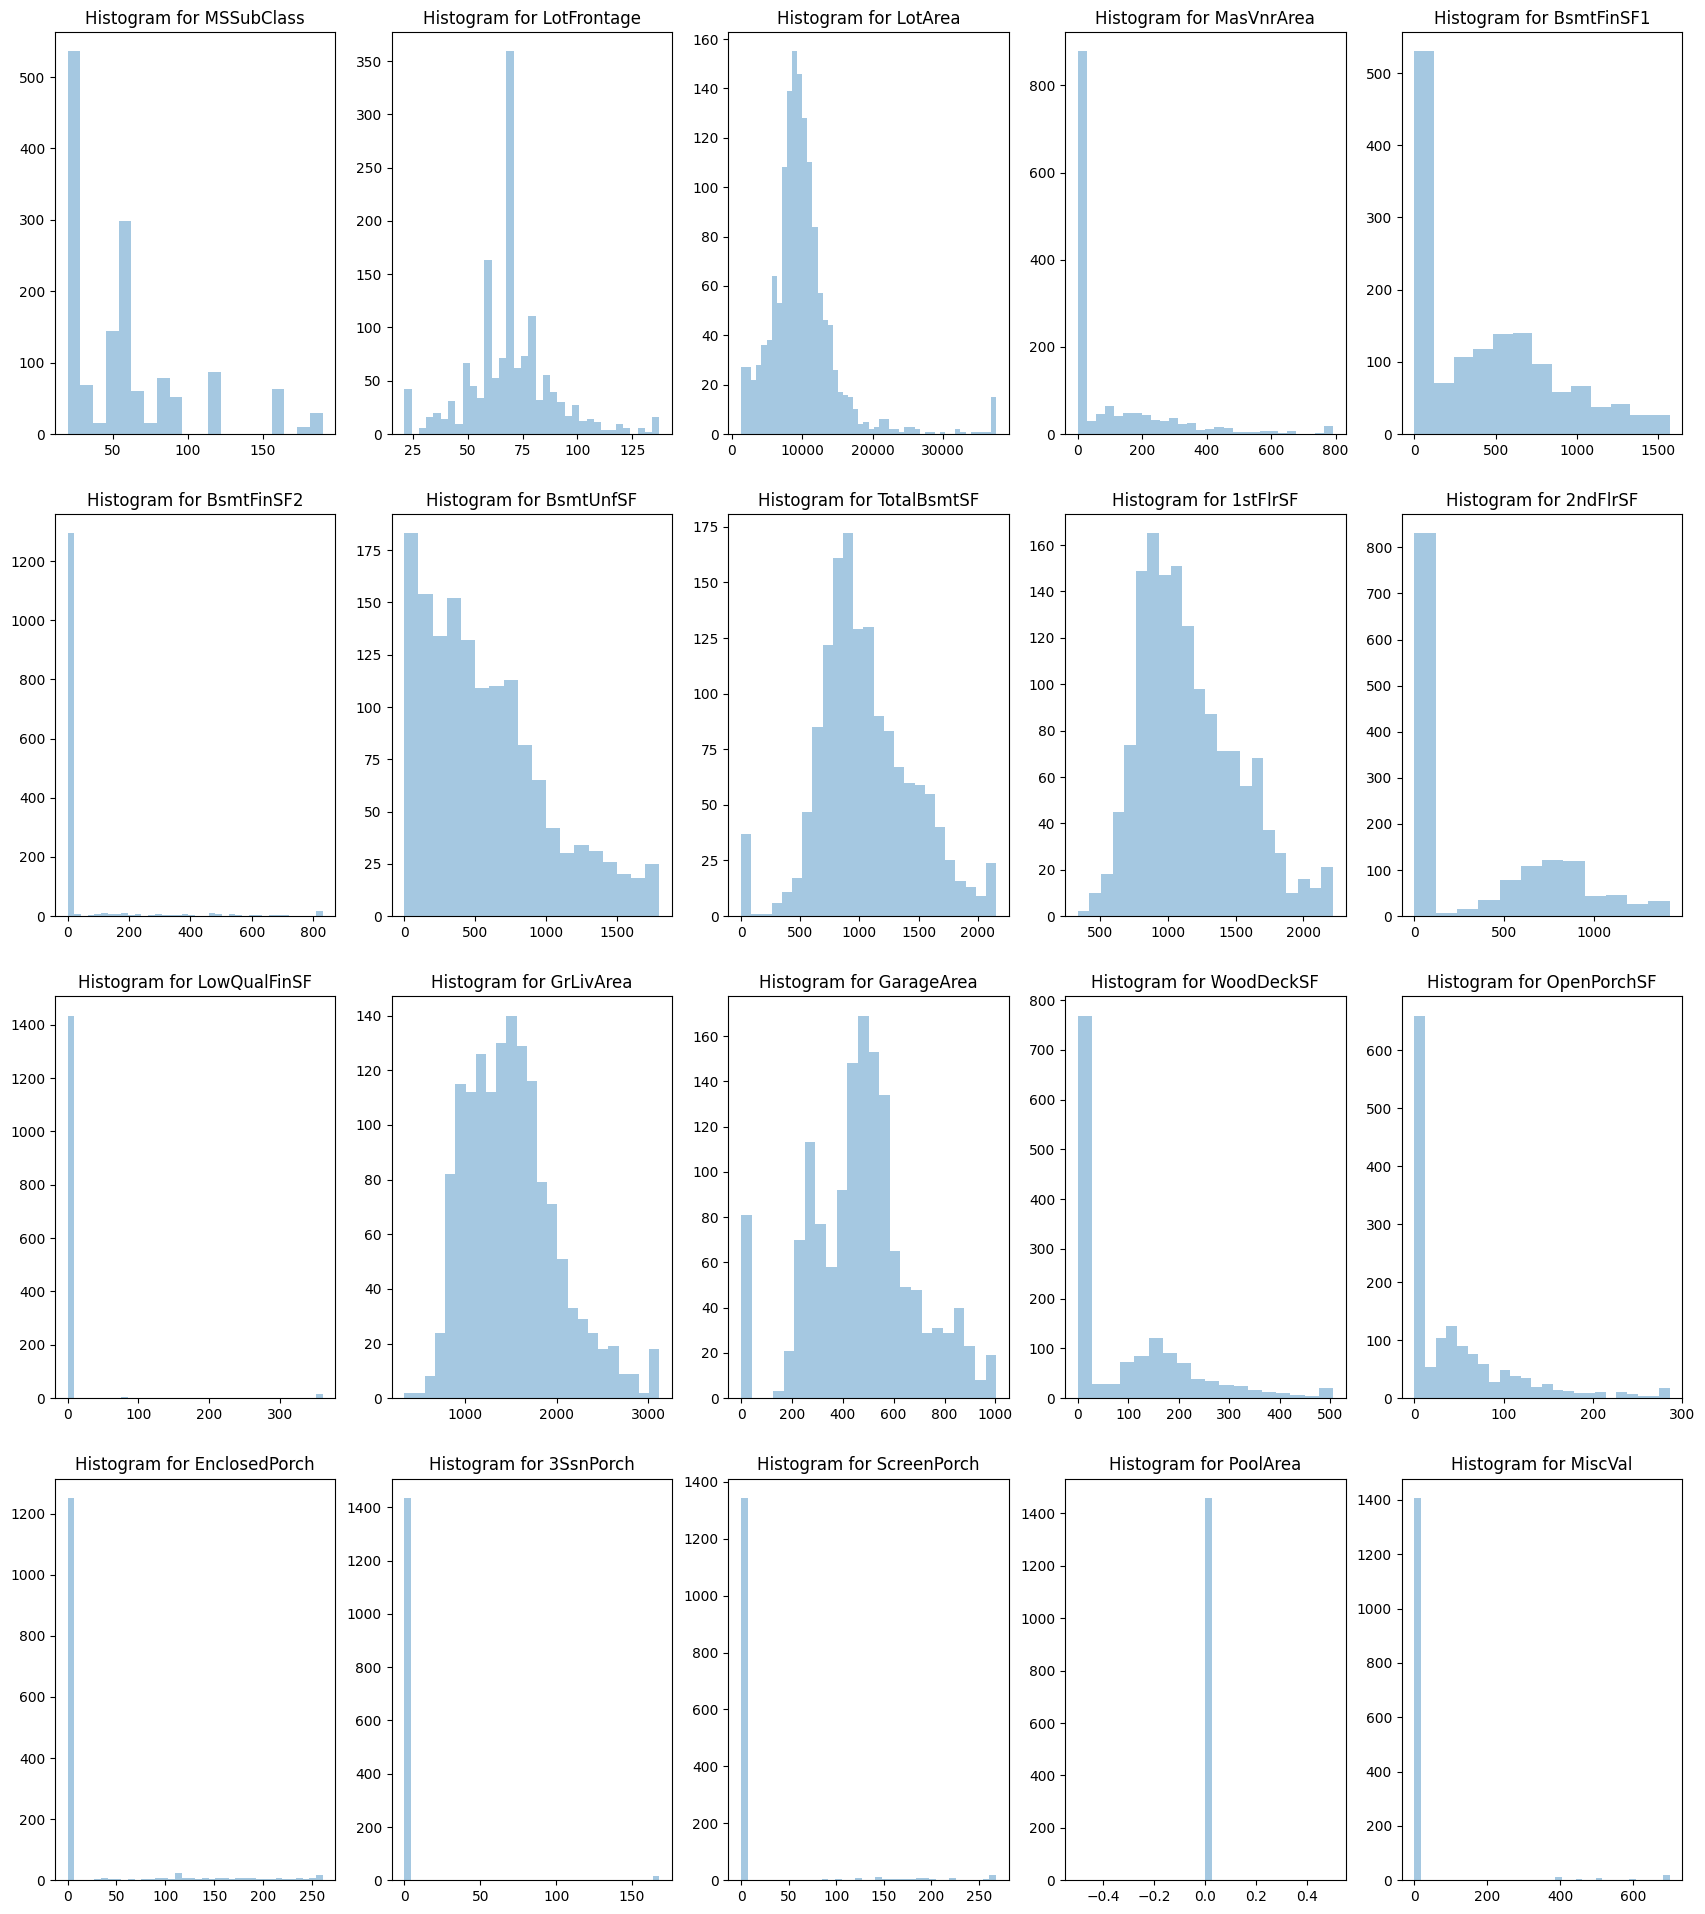

In [52]:
# Transform Skewed features

plt.figure(figsize=(21,24))
col=1

for i in numerical_features.columns:
    if i not in discreet_features:
        if col <21:
            plt.subplot(4,5,col)
            sns.distplot(df[i], kde=False).set(xlabel=None)
            plt.title("Histogram for %s" % (i))
        col+=1
        

In [53]:
# Transforming data using Box cox transformation


df["LotFrontage"] = stats.boxcox(df['LotFrontage'])[0]
df["LotArea"] = stats.boxcox(df['LotArea'])[0]
df["MasVnrArea"] = df["MasVnrArea"].apply(lambda x:x**(1/1.5))
df["BsmtUnfSF"] = df["BsmtUnfSF"].apply(lambda x:x**(1/1.4))
df["BsmtUnfSF"] = df["BsmtUnfSF"].apply(lambda x:x**(1/1.5))

df["TotalBsmtSF"] = df["TotalBsmtSF"].apply(lambda x:x**(1/1.4))
df["1stFlrSF"] = df["1stFlrSF"].apply(lambda x:x**(1/4))
df["GrLivArea"] = df["GrLivArea"].apply(lambda x:x**(1/4.5))
df["GarageArea"] = df["GarageArea"].apply(lambda x:x**(1/1.1))

In [54]:
# Converting Categorical feaures

le=LabelEncoder()

for i in categorical_features.columns:
    df[i] = le.fit_transform(df[i])
    df_test[i]=le.fit_transform(df_test[i])

In [55]:
df[categorical_features.columns].head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  KitchenQual  Functional  \
0             5           2           2  ...            2           6   
1            24           1           2  ...            3           6   
2             5           2           2  ...            2           6   
3             6           2           2  ...            2           6   
4            15           2           2  ...            2           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            3           1             2           5           5           2   
1            5           1             2           5           5           2   
2            5           1             2           5           5           2   
3            2           5             3           5           5           2   
4            5           1             2           5           5           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 39 columns]

## Model Implementation

In [56]:


X= df.drop(['SalePrice'],axis=1)

y= df['SalePrice']
kf = KFold(n_splits=5)

In [57]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_val,X_test, y_val,y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=123)
    

In [58]:
# Standarsise features 

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [59]:
features = X_train.columns

X_train[features] = scaler.transform(X_train)
X_val[features] = scaler.transform(X_val)
X_test[features] = scaler.transform(X_test)

/var/folders/0r/q_8nrq1s77lbvmzhtbgcwsbw0000gn/T/ipykernel_21705/3435954326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = scaler.transform(X_train)


In [60]:
print("Number of columns in train ",len(X_train.columns))

Number of columns in train  75


In [61]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    0.076081   -0.0375    -0.207516 -0.190861  0.065568  0.757076   
1   -0.865514   -0.0375     0.550203  0.078142  0.065568  0.757076   
2    0.076081   -0.0375    -0.053183  0.426562  0.065568 -1.368561   
3    0.311480   -0.0375    -0.468225  0.066938  0.065568 -1.368561   
4    0.076081   -0.0375     0.746864  0.977918  0.065568 -1.368561   

   LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0     0.307994  -0.029273   0.605467  -0.222613  ...     0.255163   
1     0.307994  -0.029273  -0.621221  -0.222613  ...    -0.736537   
2     0.307994  -0.029273   0.605467  -0.222613  ...    -0.053728   
3     0.307994  -0.029273  -1.847909  -0.222613  ...    -0.167529   
4     0.307994  -0.029273  -0.621221  -0.222613  ...     0.629082   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.366508  -0.131994    -0.279487       0.0 -0.193251 -1.608863   
1      -0.366508  -0.131994    -0.279487       0.0 -0.193251 -0.486088   
2      -0.366508  -0.131994    -0.279487       0.0 -0.193251  1.010947   
3       4.150024  -0.131994    -0.279487       0.0 -0.193251 -1.608863   
4      -0.366508  -0.131994    -0.279487       0.0 -0.193251  2.133723   

     YrSold  SaleType  SaleCondition  
0  0.136372  0.323112       0.215228  
1 -0.622114  0.323112       0.215228  
2  0.136372  0.323112       0.215228  
3 -1.380600  0.323112      -3.363221  
4  0.136372  0.323112       0.215228  

[5 rows x 75 columns]

In [62]:
# Generate correlation matrix and compare correlation of features
cor_features =set()
def correlation(data,threshold):
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j]>threshold:
                col_name = corr.columns[i],corr.columns[j]
                cor_features.add(col_name)
    return cor_features


print(' Correlated features ', correlation(X_train,0.8))
                

 Correlated features  {('GarageArea', 'GarageCars'), ('TotRmsAbvGrd', 'GrLivArea'), ('Exterior2nd', 'Exterior1st')}


The above features have very high correlation with other features. So dropping these features to avoid multicollinearity

In [63]:
X_train.drop(["GarageArea","TotRmsAbvGrd","Exterior2nd"], axis=1, inplace=True)
X_val.drop(["GarageArea","TotRmsAbvGrd","Exterior2nd"], axis=1, inplace=True)
X_test.drop(["GarageArea","TotRmsAbvGrd","Exterior2nd"], axis=1, inplace=True)

/var/folders/0r/q_8nrq1s77lbvmzhtbgcwsbw0000gn/T/ipykernel_21705/1730799788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(["GarageArea","TotRmsAbvGrd","Exterior2nd"], axis=1, inplace=True)


In [64]:
print("Number of columns in train ",len(X_train.columns))

Number of columns in train  72


### Linear Regression

In [65]:
params = {
    'fit_intercept' : [True, False],
    'positive' : [True, False]
}

lr_cv = GridSearchCV(LinearRegression(),params, cv=5)
lr_cv.fit(X_train,y_train)

lr = lr_cv.best_estimator_
lr.fit(X_train,y_train)

LinearRegression(positive=True)

In [66]:
p =lr.predict(X_val)
r2_score(y_val,p)

0.7705005512043338

### Ridge Regression

In [67]:
params ={
    'alpha': [0.7,0.8,0.9,1],
    'fit_intercept': [True,False],
    'positive': [False],
    'solver': ['auto','svd','cholesky', 'saga']
}

rg_cv = GridSearchCV(Ridge(), params , cv=5)
rg_cv.fit(X_train,y_train)

rg = rg_cv.best_estimator_
rg.fit(X_train,y_train)

/Users/gayathri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gayathri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gayathri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gayathri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=1, solver='saga')

### Decision Tree

In [68]:
params ={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [2,4,8,16,32],
    'min_samples_leaf': [2,4,8,16,32],
    'min_samples_split': [2,4,8,16,32]
}

dt_cv = GridSearchCV(DecisionTreeRegressor(), params , cv=5)
dt_cv.fit(X_train,y_train)

dt = dt_cv.best_estimator_
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=16)

### Ramdomforest

In [69]:
param = {
    "max_depth":[2,4,8,16,32],
    "n_estimators":[5,50,250,500]
}

rf_cv = GridSearchCV(RandomForestRegressor(), param, cv=5)
rf_cv.fit(X_train,y_train)

rf = rf_cv.best_estimator_
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=32, n_estimators=250)

### Gradient Boosting

In [70]:
parameters = {
    "learning_rate":[0.01,0.1,1.0],
    "max_depth":[2,4,8,16],
    "n_estimators":[5,50,250]
}

gb_cv = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
gb_cv.fit(X_train,y_train)

gb = gb_cv.best_estimator_
gb.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=250)

### XGBoost

In [71]:
parameters = {
    "early_stopping_rounds":[5,10],
    "eval_metric":["rmse","mae","logloss"],
    "learning_rate":[0.01,0.1,1.0],
    "max_depth":[2,4,8,16],
    "n_estimators":[5,50,250,500]
}

xgb_cv = GridSearchCV(XGBRegressor(), parameters, cv=5)
xgb_cv.fit(X_train,y_train, eval_set=[(X_val,y_val)], verbose=None)

xgb = xgb_cv.best_estimator_
xgb.fit(X_train,y_train, eval_set=[(X_val,y_val)], verbose=None)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### KNN Regressor

In [72]:
parameters = {
    "algorithm":["ball_tree","kd_tree","brute"],
    "metric":["minkowski","euclidean","manhattan"],
    "n_neighbors":range(2,21),
    "weights":["uniform","distance"]
}

knn_cv = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
knn_cv.fit(X_train,y_train)

knn = knn_cv.best_estimator_
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=8,
                    weights='distance')

### SVR

In [73]:
parameters = {
    "C":[0.001,0.01,0.1,1.0,10,100,1000],
    "kernel":["linear","poly","rbf","sigmoid"]
}

svr_cv = GridSearchCV(SVR(), parameters, cv=5)
svr_cv.fit(X_train,y_train)

svr = svr_cv.best_estimator_
svr.fit(X_train,y_train)

SVR(C=1000, kernel='linear')

In [74]:
estimators = [('lr',lr),('dt',dt),('rf',rf),('gb',gb),('knn',knn),('svr',svr)]
param ={
    'passthrough':[True, False]
}

sr_cv = GridSearchCV(StackingRegressor(estimators=estimators, final_estimator=lr), param, cv=5)
sr_cv.fit(X_train,y_train)

sr = sr_cv.best_estimator_
sr.fit(X_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression(positive=True)),
                              ('dt',
                               DecisionTreeRegressor(max_depth=16,
                                                     min_samples_leaf=16)),
                              ('rf',
                               RandomForestRegressor(max_depth=32,
                                                     n_estimators=250)),
                              ('gb',
                               GradientBoostingRegressor(max_depth=2,
                                                         n_estimators=250)),
                              ('knn',
                               KNeighborsRegressor(algorithm='ball_tree',
                                                   metric='manhattan',
                                                   n_neighbors=8,
                                                   weights='distance')),
                              ('svr', SVR(C=1000, kernel='linear'))],
                  final_estimator=LinearRegression(positive=True))

### Evaluate on validation and test data

In [75]:
def evaluate(models,X,y):
    
    eval_df = pd.DataFrame()
    
    for i in models:
        start = time()
        pred = i.predict(X)
        end = time()
        temp =pd.DataFrame(
        {
            'R2 score': ("%0.3f" % (r2_score(y,pred))),
            "Adjusted R2":("%0.3f" % (1-(1-r2_score(y,pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))),
            "MAE" : ("%0.3f" %mean_absolute_error(y,pred)),
            "MSE": ("%0.3f" % mean_squared_error(y,pred)),
            "RMSE" : ("%0.3f" % np.sqrt(mean_squared_error(y,pred))),
            "Latency" : ("%0.1fms" % ((end -start)*1000))
        }, index = [str(i).split('Regressor')[0].split("(")[0]]
        )
        eval_df = pd.concat([eval_df,temp])
        
    print(eval_df)
    

In [76]:
models = [lr,rg,dt,rf,gb,xgb,knn,svr,sr]

evaluate(models,X_val,y_val)


                 R2 score Adjusted R2        MAE             MSE       RMSE  \
LinearRegression    0.771       0.755  23379.679  1810932832.113  42555.056   
Ridge               0.788       0.774  22017.896  1671763852.891  40887.209   
DecisionTree        0.769       0.754  25215.238  1824675744.730  42716.223   
RandomForest        0.844       0.834  18475.877  1228308968.526  35047.239   
GradientBoosting    0.848       0.838  17827.403  1199720135.016  34636.976   
XGB                 0.831       0.820  17371.312  1334066999.121  36524.882   
KNeighbors          0.724       0.706  22658.423  2175235321.455  46639.418   
SVR                 0.767       0.752  20354.949  1839820725.460  42893.131   
Stacking            0.841       0.830  17316.906  1256714374.968  35450.167   

                 Latency  
LinearRegression   5.4ms  
Ridge             10.5ms  
DecisionTree       1.0ms  
RandomForest      42.8ms  
GradientBoosting   1.0ms  
XGB                3.0ms  
KNeighbors        19

In [77]:
evaluate(models,X_test,y_test)

                 R2 score Adjusted R2        MAE             MSE       RMSE  \
LinearRegression    0.729       0.711  22975.544  1473905027.107  38391.471   
Ridge               0.760       0.745  20002.628  1302857969.009  36095.124   
DecisionTree        0.646       0.623  27186.374  1926660312.252  43893.739   
RandomForest        0.741       0.724  19454.834  1407560363.778  37517.467   
GradientBoosting    0.773       0.758  19009.935  1233924239.136  35127.258   
XGB                 0.824       0.813  18757.340   955367391.294  30909.018   
KNeighbors          0.736       0.719  21445.712  1435583004.243  37889.088   
SVR                 0.778       0.764  19566.015  1205749433.188  34723.903   
Stacking            0.797       0.784  17121.819  1104004190.094  33226.559   

                 Latency  
LinearRegression   7.7ms  
Ridge              2.2ms  
DecisionTree       4.2ms  
RandomForest      28.9ms  
GradientBoosting   1.0ms  
XGB                2.7ms  
KNeighbors         9